# Libs

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import jarque_bera

# Introducci√≥n

## Introducci√≥n al problema

La optimizaci√≥n de la producci√≥n agr√≠cola es un pilar fundamental para la sostenibilidad y competitividad del sector agroindustrial. Para el Ingenio La Providencia, la variabilidad en el rendimiento de la ca√±a por hect√°rea (TCH) y en la calidad de la materia prima (medida por el % de sacarosa) representa un desaf√≠o constante en la planificaci√≥n de sus operaciones. Esta incertidumbre puede afectar directamente la log√≠stica de la cosecha, la eficiencia de los procesos en planta y, en √∫ltima instancia, la rentabilidad del negocio.

El presente proyecto aborda este desaf√≠o mediante la aplicaci√≥n de t√©cnicas de machine learning sobre los datos hist√≥ricos del ingenio. El objetivo principal es desarrollar modelos predictivos capaces de estimar con precisi√≥n dos indicadores cr√≠ticos:

1.  **Las Toneladas de Ca√±a por Hect√°rea (TCH)**, para anticipar el volumen de producci√≥n.
2.  **El Porcentaje de Sacarosa (%Sac.Ca√±a)**, para prever la calidad y el potencial de az√∫car extra√≠ble.

Adicionalmente, se busca crear un sistema de clasificaci√≥n que categorice el desempe√±o de los cultivos en niveles **alto, medio y bajo** para ambas variables. La implementaci√≥n exitosa de estos modelos permitir√° al Ingenio La Providencia pasar de una toma de decisiones reactiva a una estrategia proactiva, optimizando la gesti√≥n de recursos, mejorando la planificaci√≥n de la zafra y maximizando tanto la productividad como la calidad de su producci√≥n.

## Descripci√≥n del Conjunto de Datos



Los datos provenientes de la base de datos **`HISTORICO_SUERTES.xlsx`** conforman un registro detallado de las operaciones agr√≠colas y los resultados de producci√≥n del Ingenio La Providencia. Se presume que cada fila representa un evento de cosecha para una "suerte" (lote de cultivo) espec√≠fica. El conjunto de variables puede interpretarse y agruparse en las siguientes categor√≠as funcionales:

### 1. Variables de Identificaci√≥n y Agron√≥micas Fundamentales
Este grupo de variables permite identificar de manera √∫nica cada lote y describe sus caracter√≠sticas f√≠sicas y de cultivo.
* **Identificadores:** `Hacienda`, `Nombre` y `Suerte` funcionan como el identificador √∫nico de cada parcela. `Zona` y `Dist Km` la sit√∫an geogr√°ficamente y establecen su distancia a la planta, un factor log√≠stico clave.
* **Caracter√≠sticas del Cultivo:** `Area Neta` define la superficie productiva del lote. Variables como `Suelo`, `Variedad`, `F.Siembra`, y `Cod.Estado` (que indica el n√∫mero de corte, ej. "Plantilla" para la primera siembra o "Corte 2" para la segunda cosecha) son fundamentales, ya que definen el potencial gen√©tico y el ciclo de vida del cultivo.

### 2. Variables de Manejo y Pr√°cticas Agr√≠colas
Aqu√≠ se registran las intervenciones humanas y las decisiones de manejo que influyen directamente en el desarrollo y la maduraci√≥n de la ca√±a.
* **Labores Culturales:** Se documentan pr√°cticas clave como el riego (`Num.Riegos`, `M3 Riego`, `Ult.Riego`), la fertilizaci√≥n (`Fert.Nitrogen.`, `Urea 46%`, `Vinaza`) y el uso de madurantes qu√≠micos (`Producto`, `Dosis Madurante`), que son palancas cr√≠ticas para optimizar el rendimiento.
* **Cosecha:** Variables como `Tipo Quema` (verde o quemada) y `T.Corte` (mecanizado o manual) describen el m√©todo de cosecha, el cual tiene un impacto directo en la calidad de la materia prima que llega al ingenio.

### 3. Variables de Producci√≥n y Calidad (Variables Objetivo)
Este es el grupo m√°s importante, ya que contiene los indicadores de desempe√±o que se busca predecir.
* **Productividad:** La variable principal es **`TCH` (Toneladas de Ca√±a por Hect√°rea)**, que mide el rendimiento agr√≠cola del lote. Est√° directamente relacionada con `TonUltCorte`, que es la producci√≥n total en toneladas.
* **Calidad:** La variable clave de calidad es **`%Sac.Ca√±a`**, que representa el porcentaje de sacarosa en la ca√±a y determina su valor para la producci√≥n de az√∫car. Se complementa con otras m√©tricas como `Rdto` (Rendimiento industrial) y `%ATR` (Az√∫cares Totales Recuperables), que tambi√©n reflejan la eficiencia en la extracci√≥n de az√∫car.

### 4. Variables Clim√°ticas y Ambientales
El desempe√±o de un cultivo depende en gran medida del entorno. Este grupo de variables busca capturar esas condiciones.
* **Clima:** Se registran datos meteorol√≥gicos cruciales como `Lluvias`, `Temp. Media`, `Humedad Rel Media` y `Radiacion Solar`. Es notable que estas variables est√°n agregadas en diferentes ventanas de tiempo (ej. `0-3 meses`, `Ciclo completo`), lo que permite analizar c√≥mo las condiciones clim√°ticas en distintas etapas fenol√≥gicas del cultivo afectan el resultado final.
* **Sanidad:** La variable `%Infest.Diatrea` es un indicador de la salud del cultivo, midiendo el impacto de una de las plagas m√°s significativas de la ca√±a de az√∫car.

La base de datos **`BD_IPSA_1940.xlsx`** proporciona un conjunto de variables consolidadas, orientadas a la tarea de clasificaci√≥n del desempe√±o de los lotes. A diferencia del set de datos hist√≥ricos para regresi√≥n, este parece estar m√°s enfocado en factores agron√≥micos clave y los resultados finales de cosecha. Cada fila representa un evento de cosecha para una variedad espec√≠fica, CC01-1940.

Las variables presentes pueden agruparse e interpretarse de la siguiente manera:

### 1. Variables de Identificaci√≥n y Caracter√≠sticas del Cultivo
Este grupo de variables permite identificar el lote y define sus condiciones agron√≥micas b√°sicas.
* **Identificadores:** `NOME`, `FAZ` (Hacienda) y `TAL` (Talh√£o o Suerte) identifican la unidad productiva espec√≠fica.
* **Caracter√≠sticas Agron√≥micas:** `variedad` especifica el tipo de ca√±a. `tipocorte` describe el m√©todo de cosecha. `cortes` indica el n√∫mero de cosechas que ha tenido la planta (su ciclo de soca), y `edad` representa la edad del cultivo en meses al momento del corte, dos factores determinantes en la productividad.

### 2. Variables de Manejo de Maduraci√≥n
Un conjunto de variables est√° dedicado exclusivamente a la pr√°ctica de maduraci√≥n qu√≠mica, sugiriendo su importancia como factor predictivo.
* `madurada`: Es una variable categ√≥rica (SI/NO) que indica si se aplic√≥ o no un producto para inducir la maduraci√≥n.
* `producto`, `dosismad` (Dosis del Madurante) y `semsmad` (Semanas desde la aplicaci√≥n hasta la cosecha): Detallan el tipo de madurante utilizado, la cantidad y el tiempo de acci√≥n, lo que permite evaluar la efectividad de esta pr√°ctica agr√≠cola.

### 3. Indicadores de Desempe√±o y Calidad (Variables a Clasificar)
Estas son las variables centrales del problema. A partir de ellas se construir√°n las categor√≠as de "alto", "medio" y "bajo" rendimiento.
* **Variables Objetivo (Continuas):** **`TCH` (Toneladas de Ca√±a por Hect√°rea)** y **`sacarosa` (%)** son los indicadores directos de la productividad agr√≠cola y la calidad industrial, respectivamente. Estos valores ser√°n la base para crear las etiquetas de clasificaci√≥n.
* **Indicadores Adicionales:** `pct_diatrea` (% de infestaci√≥n de Diatraea) y `me` (probablemente Materia Extra√±a) son m√©tricas que reflejan la sanidad y limpieza del cultivo, factores que impactan negativamente tanto el TCH como la sacarosa. `vejez` podr√≠a indicar el tiempo en horas o d√≠as entre el corte y la molienda, un factor cr√≠tico para la calidad.

### 4. Variables de Contexto Temporal y Ambiental
Este grupo final de variables sit√∫a cada cosecha en un contexto espec√≠fico.
* `mes` y `periodo`: Definen el momento exacto de la cosecha, permitiendo analizar la estacionalidad.
* `lluvias`: Es una variable clim√°tica fundamental que resume las precipitaciones acumuladas en un periodo relevante para la cosecha.
* `grupo_tenencia`: Es una variable categ√≥rica que probablemente se refiere al tipo de propiedad o administraci√≥n del lote (ej. propio, arrendado), lo cual puede implicar diferencias en las estrategias de manejo.

# Modelo de Regresi√≥n

## An√°lisis Exploratorio de Datos (EDA)

In [2]:
# Opci√≥n para ver TODAS las filas (None significa sin l√≠mite)
pd.set_option('display.max_rows', None)

# Opci√≥n para ver TODAS las columnas (None significa sin l√≠mite)
pd.set_option('display.max_columns', None)

# Opci√≥n para aumentar el ancho de la l√≠nea y evitar que se corte la tabla
pd.set_option('display.width', 1000)

In [3]:
file_name = 'data/HISTORICO_SUERTES.xlsx'

df = pd.read_excel(file_name)

df.head(3)

Per√≠odo  Hacienda           Nombre  Zona  Tenencia Suerte       Suelo  Area Neta  Dist Km   Variedad  Cod.Estado # Cod.Estado  F.Siembra  D.S.  Ult.Riego  Edad Ult Cos F.Ult.Corte  Destino 1=Semilla  Cod. T.Cultivo Cultivo Fec.Madur.                            Producto  Dosis Madurante  Semanas mad.  TonUltCorte         TCH       TCHM  Ton.Azucar     Rdto        TAH      TAHM  Sac.Ca√±a Precosecha  Edad.Precosecha  %Sac.Ca√±a  %Sac.Muestreadora     %ATR       KATRHM  %Fibra Ca√±a  %AR Jugo  %ME Min  %ME Veg  %ME Tot     Brix   Pureza   Vejez    Tipo Quema     T.Corte    Cerca de Cosech√≥  Num.Riegos  M3 Riego  DDUlt.Riego  Lluvias (2 Meses Ant.)  Lluvias Ciclo  Lluvias 0 -3  Lluvias tres a seis  Lluvias seis a nueve  Luvias 9 -FC  %Infest.Diatrea  Fosfato Jugo  Fert.Nitrogen.  Urea 46%  MEZ  Boro Granul.  MicroZinc  NITO_XTEND  Sul.Amonio  NITRAX-S  Vinaza Codigo Estacion  Temp. Media 0-3  Temp. Media Ciclo  Temp Max Ciclo  Temp Min Ciclo  Humedad Rel Media 0-3   \
0   201701     80493        LA CONCHA  IP02      51.0   002A   CANTARINA       6.00      4.3    CC85-92             5    Corte 5 2010-08-20   NaN        NaT         12.81  2017-01-02                  0             1.0  Normal 2016-11-04  BONUS 250 EC REGULADOR FISIOL√ìGICO              1.0      8.428571       727.19  121.198333   9.461228      86.050  11.8332  14.341666  1.119567              16.8172              NaN    13.7582             13.508  15.1653  1434.823641       16.910      0.84    0.355   10.198   10.553  15.7464  87.2241   2.735         VERDE  MECANIZADO  El Cerrito    AI08         NaN       0.0            0                   258.0         1038.0           0.0                454.0                 102.0         482.0              NaN         178.0             NaN       NaN  NaN           NaN        NaN         NaN         NaN       NaN     NaN             NaN              NaN                NaN             NaN             NaN                     NaN   
1   201701     81284  UKRANIA INCAUCA  IP05      81.0   039B         NaN       1.45      NaN    CC85-92             5    Corte 5 2011-01-27   NaN        NaT         11.14  2017-01-02                  0             1.0  Normal        NaT                                 NaN              0.0           NaN       136.00   93.793103   8.419488      14.728  10.8294  10.157241  0.911781                  NaN              NaN    12.8430             12.551  14.0410  1182.180399       16.936      0.55    2.298    7.273    9.571  15.2240  84.3602  73.823  Q.ACCIDENTAL      MANUAL  Candelaria    AI08         NaN       0.0            0                     0.0            0.0           0.0                  0.0                   0.0           0.0              NaN         382.0             NaN       NaN  NaN           NaN        NaN         NaN         NaN       NaN     NaN             NaN              NaN                NaN             NaN             NaN                     NaN   
2   201701     80203    EL AMPARO SAA  IP05      31.0    007  CORINTIAS        8.24     23.0  CC01-1228             4    Corte 4 2011-10-25  1.65 2016-09-17         12.32  2017-01-02                  0             1.0  Normal 2016-11-04  BONUS 250 EC REGULADOR FISIOL√ìGICO              1.1      8.428571      1436.62  174.347087  14.151549     145.268  10.1117  17.629611  1.430974              14.7749            12.02    11.9364             11.940  13.1236  1857.192723       15.512      0.61    3.000    9.323   12.323  14.1130  84.4527   2.108         VERDE  MECANIZADO     Palmira    AI08         5.0   48513.6          107                   246.0         1002.0         106.0                326.0                 113.0         457.0              NaN         226.0             NaN       NaN  NaN           NaN        NaN         NaN         NaN       NaN     NaN             NaN              NaN                NaN             NaN             NaN                     NaN   

   Humedad Rel Media Ciclo  Oscilacion Temp Med 0-3  Oscilacion Temp Ciclo  Sum

In [4]:
df.describe()

Per√≠odo      Hacienda      Tenencia     Area Neta       Dist Km  Cod.Estado #                      F.Siembra                      Ult.Riego  Edad Ult Cos                    F.Ult.Corte  Destino 1=Semilla  Cod. T.Cultivo                     Fec.Madur.  Dosis Madurante  Semanas mad.   TonUltCorte           TCH          TCHM    Ton.Azucar          Rdto           TAH          TAHM  Sac.Ca√±a Precosecha  Edad.Precosecha     %Sac.Ca√±a  %Sac.Muestreadora          %ATR        KATRHM   %Fibra Ca√±a      %AR Jugo      %ME Min       %ME Veg       %ME Tot          Brix        Pureza         Vejez   Num.Riegos       M3 Riego   DDUlt.Riego  Lluvias (2 Meses Ant.)  Lluvias Ciclo  Lluvias 0 -3  Lluvias tres a seis  Lluvias seis a nueve  Luvias 9 -FC  %Infest.Diatrea   Fosfato Jugo  Fert.Nitrogen.      Urea 46%          MEZ  Boro Granul.    MicroZinc    NITO_XTEND    Sul.Amonio      NITRAX-S         Vinaza  Temp. Media 0-3  Temp. Media Ciclo  Temp Max Ciclo  Temp Min Ciclo  \
count   21027.000000  21027.000000  21026.000000  21027.000000  21022.000000  21027.000000                          21027                           8470   21027.00000                          21027       21027.000000    21025.000000                          11252     20923.000000  11252.000000  21027.000000  21027.000000  21027.000000  20786.000000  20760.000000  20786.000000  20786.000000         19929.000000      8919.000000  20578.000000       19169.000000  20505.000000  20505.000000  19169.000000  18903.000000  19305.00000  19307.000000  19307.000000  20760.000000  20758.000000  18582.000000  8438.000000   21027.000000  21027.000000            21027.000000   21027.000000  21027.000000         21027.000000          21027.000000  21027.000000      5600.000000   19169.000000             0.0  7.230000e+02   971.000000   1285.000000  1149.000000   3679.000000   1357.000000    748.000000    4098.000000      4530.000000        4530.000000     4530.000000     4530.000000   
mean   202039.708708  80679.334427     46.448730      8.642948     25.311806      4.261806  2015-03-11 18:18:44.839492096  2020-02-16 21:24:26.351829760      13.01111  2020-10-27 09:01:09.339420672           0.013982        1.036100  2020-08-26 19:50:03.626021888         0.536335      9.588708   1141.737477    129.608509     10.050417    124.249246     10.733766     13.888988      1.071335             7.802876        12.360247     12.320202          12.834918     13.718671   1372.453892     15.275538      0.737819      0.63653      7.761020      8.600761     13.130479     77.805153     12.294125     7.215691   25725.851363     45.997717               75.116456     526.176110    122.333534           120.193700            118.080529    165.606631         3.811395     332.501252             NaN  1.848838e+04   481.805869    118.158210   128.934639   2360.857856   2447.356346   1530.278591   74481.323472        23.375724          24.556072       34.587837       15.416313   
min    201701.000000  80100.000000     11.000000      0.004000      1.100000      0.000000            1986-04-30 00:00:00            2016-01-12 00:00:00       1.31000            2017-01-02 00:00:00           0.000000        1.000000            2016-08-12 00:00:00         0.000000     -2.000000      0.420000      1.573653      0.138403      0.000000      0.000000      0.000000      0.000000             0.000000         0.000000      7.086000           0.000000      7.750000     49.089172      0.000000      0.100000      0.00000      0.000000      0.200000      0.000000      0.000000      0.017000     1.000000       0.000000      0.000000                0.000000       0.000000      0.000000             0.000000              0.000000      0.000000         0.000000       0.000000             NaN  1.900000e+01     1.000000      1.000000     1.000000     33.000000      7.000000      1.300000       5.921000        22.040000          22.353000       32.600000       13.900000   
25%    201812.000000  80247.000000     31.000000      3.310000     12

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Per√≠odo                    21027 non-null  int64         
 1   Hacienda                   21027 non-null  int64         
 2   Nombre                     21027 non-null  object        
 3   Zona                       21027 non-null  object        
 4   Tenencia                   21026 non-null  float64       
 5   Suerte                     21027 non-null  object        
 6   Suelo                      17269 non-null  object        
 7   Area Neta                  21027 non-null  float64       
 8   Dist Km                    21022 non-null  float64       
 9   Variedad                   21027 non-null  object        
 10  Cod.Estado #               21027 non-null  int64         
 11  Cod.Estado                 21027 non-null  object        
 12  F.S

## Preparaci√≥n de datos

In [6]:
# 1. Identifica las variables o columnas en el dataset con valores nulos
columnas_con_nulos = [
    (columna, df[columna].isnull().sum())
    for columna in df.columns
    if df[columna].isnull().sum() > 0
]
# 2. Convertir la lista a un DataFrame de pandas para una mejor visualizaci√≥n
df_nulos = pd.DataFrame(columnas_con_nulos, columns=['Columna', 'Cantidad de Nulos'])

# Ordenar los resultados de mayor a menor
df_nulos_ordenado = df_nulos.sort_values(by='Cantidad de Nulos', ascending=False)


# Imprimir el DataFrame resultante
print("\nResultados en una tabla ordenada de mayor a menor:")
df_nulos_ordenado


Resultados en una tabla ordenada de mayor a menor:


Columna  Cantidad de Nulos
51  Sum Oscilacion Temp Ciclo              21027
33             Fert.Nitrogen.              21027
34                   Urea 46%              20304
40                   NITRAX-S              20279
35                        MEZ              20056
37                  MicroZinc              19878
36               Boro Granul.              19742
39                 Sul.Amonio              19670
38                 NITO_XTEND              17348
41                     Vinaza              16929
50      Oscilacion Temp Ciclo              16497
49    Oscilacion Temp Med 0-3              16497
52         Radicion Solar 0-3              16497
44          Temp. Media Ciclo              16497
45             Temp Max Ciclo              16497
46             Temp Min Ciclo              16497
47     Humedad Rel Media 0-3               16497
48    Humedad Rel Media Ciclo              16497
43            Temp. Media 0-3              16497
57          Evaporacion Ciclo              16497
56            Evaporacion 0-3              16497
54          Precipitacion 0_3              16497
55        Precipitacion Ciclo              16497
53      Radiacion Solar Ciclo              16497
31            %Infest.Diatrea              15427
42            Codigo Estacion              14742
3                        D.S.              13859
30                 Num.Riegos              12589
4                   Ult.Riego              12557
16            Edad.Precosecha              12108
8                    Producto               9778
10               Semanas mad.               9775
7                  Fec.Madur.               9775
1                       Suelo               3758
28                      Vejez               2445
22                   %AR Jugo               2124
32               Fosfato Jugo               1858
18          %Sac.Muestreadora               1858
21                %Fibra Ca√±a               1858
23                    %ME Min               1722
25                    %ME Tot               1720
24                    %ME Veg               1720
15        Sac.Ca√±a Precosecha               1098
20                     KATRHM                522
19                       %ATR                522
17                  %Sac.Ca√±a                449
27                     Pureza                269
12                       Rdto                267
26                       Brix                267
11                 Ton.Azucar                241
13                        TAH                241
14                       TAHM                241
29                   Cerca de                126
9             Dosis Madurante                104
2                     Dist Km                  5
6                     Cultivo                  2
5              Cod. T.Cultivo                  2
0                    Tenencia                  1

### **An√°lisis de Datos Faltantes y Estrategia de Mitigaci√≥n**

Tras una revisi√≥n de la completitud de los datos para los **21,027 registros** del dataset, es evidente que existe un problema significativo de valores nulos que debe ser abordado antes de cualquier modelado. La estrategia para manejar estos datos se basar√° en el porcentaje de informaci√≥n faltante por columna, dividiendo el proceso en tres fases jer√°rquicas para asegurar la integridad y robustez del conjunto de datos final.



---

#### **Fase 1: Eliminaci√≥n de Columnas Irrecuperables (> 75% de Nulos)**
Un gran n√∫mero de columnas, principalmente relacionadas con datos de fertilizantes y mediciones clim√°ticas espec√≠ficas (`Sum Oscilacion Temp Ciclo`, `Fert.Nitrogen.`, `Urea 46%`, etc.), presentan m√°s de un 75% de valores ausentes, llegando en algunos casos a estar completamente vac√≠as. Intentar imputar tal cantidad de datos ser√≠a equivalente a fabricar informaci√≥n, lo que comprometer√≠a gravemente la validez de cualquier an√°lisis posterior.

* **Acci√≥n:** Estas columnas ser√°n **eliminadas directamente** del dataset. Su escasa informaci√≥n no justifica el riesgo de introducir sesgos a trav√©s de una imputaci√≥n masiva.

In [7]:
# 1. Calcular el n√∫mero total de filas en tu DataFrame
total_filas = len(df)

# 2. Definir el umbral del 75%
umbral = total_filas * 0.75

# 3. Identificar las columnas que tienen m√°s nulos que el umbral
columnas_a_eliminar = [
    columna for columna in df.columns 
    if df[columna].isnull().sum() > umbral
]

# (Opcional pero recomendado) Imprimir las columnas que se van a eliminar
print(f"Se encontraron {len(columnas_a_eliminar)} columnas para eliminar con m√°s del 75% de nulos:")
print(columnas_a_eliminar)
print(f"\nDimensiones originales del DataFrame: {df.shape}")

# 4. Eliminar esas columnas del DataFrame
df = df.drop(columns=columnas_a_eliminar)

# 5. Verificar el resultado
print(f"Dimensiones del nuevo DataFrame limpio: {df.shape}")

Se encontraron 24 columnas para eliminar con m√°s del 75% de nulos:
['Fert.Nitrogen.', 'Urea 46%', 'MEZ', 'Boro Granul.', 'MicroZinc', 'NITO_XTEND', 'Sul.Amonio', 'NITRAX-S', 'Vinaza', 'Temp. Media 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo', 'Temp Min Ciclo', 'Humedad Rel Media 0-3 ', 'Humedad Rel Media Ciclo', 'Oscilacion Temp Med 0-3', 'Oscilacion Temp Ciclo', 'Sum Oscilacion Temp Ciclo', 'Radicion Solar 0-3', 'Radiacion Solar Ciclo', 'Precipitacion 0_3', 'Precipitacion Ciclo', 'Evaporacion 0-3', 'Evaporacion Ciclo']

Dimensiones originales del DataFrame: (21027, 85)
Dimensiones del nuevo DataFrame limpio: (21027, 61)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Per√≠odo                 21027 non-null  int64         
 1   Hacienda                21027 non-null  int64         
 2   Nombre                  21027 non-null  object        
 3   Zona                    21027 non-null  object        
 4   Tenencia                21026 non-null  float64       
 5   Suerte                  21027 non-null  object        
 6   Suelo                   17269 non-null  object        
 7   Area Neta               21027 non-null  float64       
 8   Dist Km                 21022 non-null  float64       
 9   Variedad                21027 non-null  object        
 10  Cod.Estado #            21027 non-null  int64         
 11  Cod.Estado              21027 non-null  object        
 12  F.Siembra               21027 non-null  datet

---

#### **Fase 2: Imputaci√≥n Estrat√©gica para Columnas con Nulos Moderados (10% - 75%)**
Columnas como `Edad.Precosecha` (~58% nulos), `Num.Riegos` (~60% nulos) y `Suelo` (~18% nulos) contienen informaci√≥n potencialmente valiosa, pero con una cantidad considerable de datos faltantes. La estrategia aqu√≠ ser√° m√°s matizada y depender√° de la naturaleza de la variable.

* **Para variables categ√≥ricas:** Se imputar√° utilizando la **moda** asumiendo que es la condici√≥n m√°s probable. Alternativamente, se podr√≠a crear una categor√≠a "Desconocido" si se sospecha que la ausencia del dato es informativa.
* **Para variables num√©ricas:** Se imputar√° utilizando la **mediana** o la **media** dependiendo de cual sea mas conveniente con respecto a los datos

In [9]:
# Calcular umbrales de 10% y 75%
total_filas = len(df)
umbral_inferior = total_filas * 0.10
umbral_superior = total_filas * 0.75

total_columnas_fase2 = [
    col for col in df.columns
    if (df[col].isnull().sum() > umbral_inferior) and \
       (df[col].isnull().sum() < umbral_superior)
]

print(f"Se analizar√°n {len(total_columnas_fase2)} columnas en la Fase 2:")
df[total_columnas_fase2].info()

Se analizar√°n 12 columnas en la Fase 2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Suelo            17269 non-null  object        
 1   D.S.             7168 non-null   object        
 2   Ult.Riego        8470 non-null   datetime64[ns]
 3   Fec.Madur.       11252 non-null  datetime64[ns]
 4   Producto         11249 non-null  object        
 5   Semanas mad.     11252 non-null  float64       
 6   Edad.Precosecha  8919 non-null   float64       
 7   %AR Jugo         18903 non-null  float64       
 8   Vejez            18582 non-null  float64       
 9   Num.Riegos       8438 non-null   float64       
 10  %Infest.Diatrea  5600 non-null   float64       
 11  Codigo Estacion  6285 non-null   object        
dtypes: datetime64[ns](2), float64(6), object(4)
memory usage: 1.9+ MB


#### Numericas

--- An√°lisis de 'Semanas mad.' ---
  - Asimetr√≠a (Skewness): 3.43
  - Media: 9.59
  - Mediana: 8.57


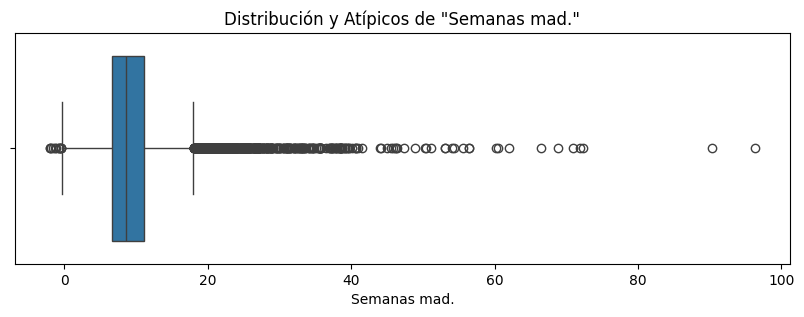



--- An√°lisis de 'Edad.Precosecha' ---
  - Asimetr√≠a (Skewness): -0.84
  - Media: 12.36
  - Mediana: 12.09


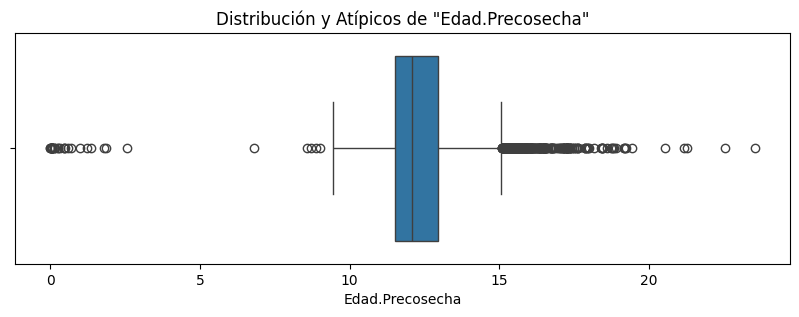



--- An√°lisis de '%AR Jugo' ---
  - Asimetr√≠a (Skewness): 1.18
  - Media: 0.74
  - Mediana: 0.70


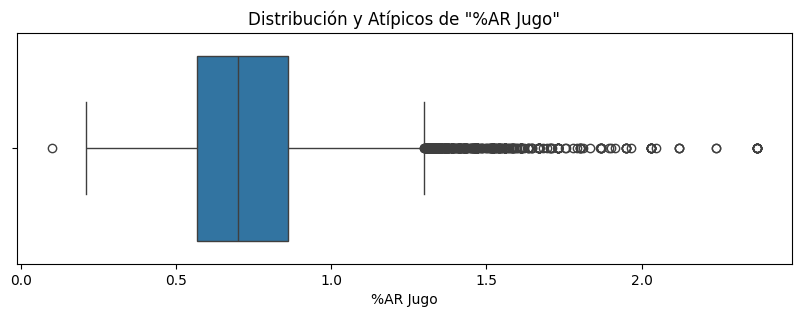



--- An√°lisis de 'Vejez' ---
  - Asimetr√≠a (Skewness): 2.90
  - Media: 12.29
  - Mediana: 2.74


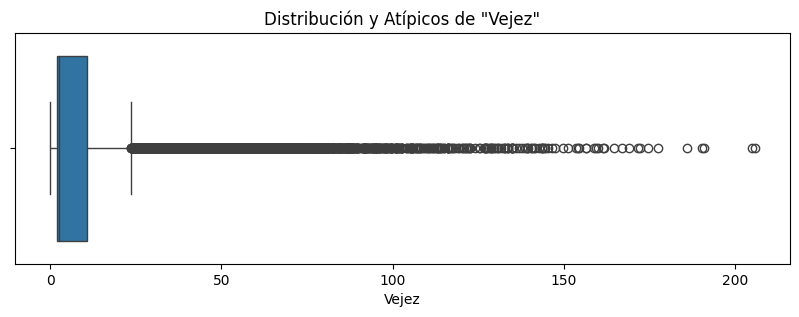



--- An√°lisis de 'Num.Riegos' ---
  - Asimetr√≠a (Skewness): 10.54
  - Media: 7.22
  - Mediana: 5.00


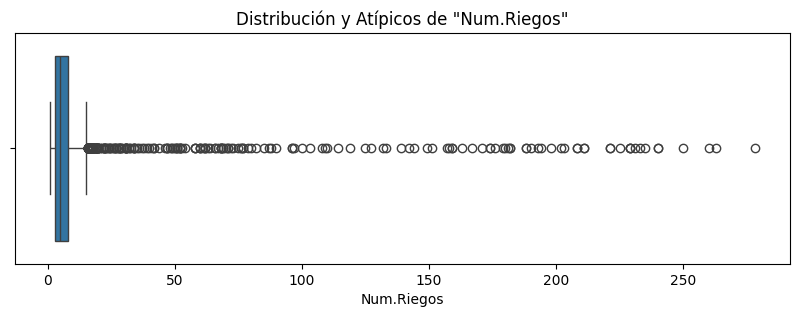



--- An√°lisis de '%Infest.Diatrea' ---
  - Asimetr√≠a (Skewness): 2.36
  - Media: 3.81
  - Mediana: 3.14


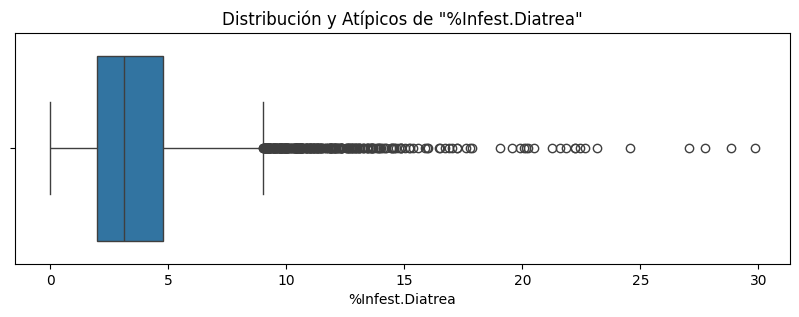

In [10]:
# Iteramos sobre cada columna para analizarla individualmente

columnas_fase2 = [
    col for col in total_columnas_fase2
    if df[col].dtype in ['int64', 'float64']
]

for columna in columnas_fase2:
    # --- C√°lculo de estad√≠sticas ---
    asimetria = df[columna].skew()
    media = df[columna].mean()
    mediana = df[columna].median()
    
    print(f"--- An√°lisis de '{columna}' ---")
    print(f"  - Asimetr√≠a (Skewness): {asimetria:.2f}")
    print(f"  - Media: {media:.2f}")
    print(f"  - Mediana: {mediana:.2f}")
    
    # --- Visualizaci√≥n del Boxplot ---
    plt.figure(figsize=(10, 3)) # Crea una figura nueva para cada gr√°fico
    sns.boxplot(x=df[columna])
    plt.title(f'Distribuci√≥n y At√≠picos de "{columna}"')
    plt.show() # Muestra el gr√°fico en la salida de la celda
    print("\n") # Agrega un espacio para mayor claridad

In [11]:
# Listas para clasificar las columnas
columnas_para_mediana = []
columnas_para_media = []

# Umbral de asimetr√≠a para decidir. Si |asimetr√≠a| > 1.0, se considera muy asim√©trica.
umbral_asimetria = 1.0

# Clasificamos cada columna bas√°ndonos en su asimetr√≠a
for columna in columnas_fase2:
    asimetria = df[columna].skew()
    
    if abs(asimetria) > umbral_asimetria:
        columnas_para_mediana.append(columna)
    else:
        columnas_para_media.append(columna)

print("--- Clasificaci√≥n Final para Imputaci√≥n ---")
print(f"‚úÖ Columnas a imputar con MEDIANA (distribuci√≥n asim√©trica):")
print(f"   {columnas_para_mediana}")
print(f"\n‚úÖ Columnas a imputar con MEDIA (distribuci√≥n sim√©trica):")
print(f"   {columnas_para_media}")

--- Clasificaci√≥n Final para Imputaci√≥n ---
‚úÖ Columnas a imputar con MEDIANA (distribuci√≥n asim√©trica):
   ['Semanas mad.', '%AR Jugo', 'Vejez', 'Num.Riegos', '%Infest.Diatrea']

‚úÖ Columnas a imputar con MEDIA (distribuci√≥n sim√©trica):
   ['Edad.Precosecha']


In [12]:
# Imputar con la MEDIANA
if columnas_para_mediana:
    mediana_imputacion = df[columnas_para_mediana].median()
    df[columnas_para_mediana] = df[columnas_para_mediana].fillna(mediana_imputacion)
    print("-> Valores nulos imputados con la MEDIANA.")

# Imputar con la MEDIA
if columnas_para_media:
    media_imputacion = df[columnas_para_media].mean()
    df[columnas_para_media] = df[columnas_para_media].fillna(media_imputacion)
    print("-> Valores nulos imputados con la MEDIA.")


df[columnas_para_mediana].info()
df[columnas_para_media].info()

-> Valores nulos imputados con la MEDIANA.
-> Valores nulos imputados con la MEDIA.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Semanas mad.     21027 non-null  float64
 1   %AR Jugo         21027 non-null  float64
 2   Vejez            21027 non-null  float64
 3   Num.Riegos       21027 non-null  float64
 4   %Infest.Diatrea  21027 non-null  float64
dtypes: float64(5)
memory usage: 821.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Edad.Precosecha  21027 non-null  float64
dtypes: float64(1)
memory usage: 164.4 KB


#### Categoricas

--- An√°lisis de Distribuci√≥n para: 'Suelo' ---
Conteo de valores (incluyendo nulos):
Suelo
CORINTIAS               4042
NaN                     3758
GALPON                  2282
PALMIRA                 1457
MANUELITA                742
NUEVO PICHICHI           599
CERRITO                  431
BURRIGA                  415
PALMERAS                 407
SANTA ROSA               336
RIO LA PAILA             285
GENOVA                   278
AMAIME                   272
JUANCHITO                239
GUADUAL                  236
BALLESTEROS              229
CERRITO-NIMA             227
JORDAN                   213
PALMICHE                 210
NIMA                     195
ESNEDA                   170
MARSELLA                 167
MARGARITA                158
TIBET                    156
GENOVEZ                  139
JAMAICA                  139
NARINO                   132
VILLA                    115
PALMIRITA                115
OVEJERA                  110
ESMERALDA                107
YUMBO   

C:\Users\Juan Jose\AppData\Local\Temp\ipykernel_17196\648512961.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[columna], order=df[columna].value_counts().index, palette='viridis')


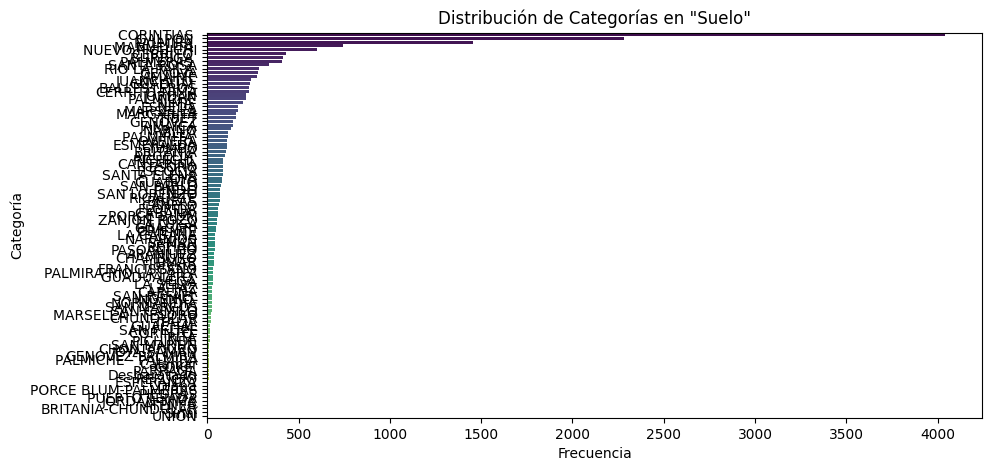



--- An√°lisis de Distribuci√≥n para: 'D.S.' ---
Conteo de valores (incluyendo nulos):
D.S.
NaN     13859
1.65     7148
DS         19
1.5         1
Name: count, dtype: int64




C:\Users\Juan Jose\AppData\Local\Temp\ipykernel_17196\648512961.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[columna], order=df[columna].value_counts().index, palette='viridis')


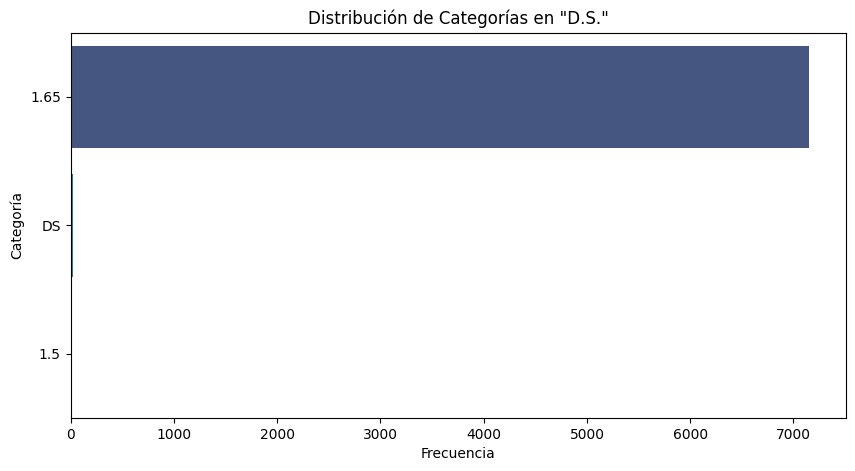



--- An√°lisis de Distribuci√≥n para: 'Producto' ---
Conteo de valores (incluyendo nulos):
Producto
NaN                                      9778
BONUS 250 EC REGULADOR FISIOL√ìGICO       7001
BONUS 250 EC REGULADOR FISIOLOGICO       3380
COADYUVANTE  DOUCE                        380
FERTILIZANTE LIQUIDO RENDIMIENTO          179
FUSILADE 2000 BL                           84
AGROFOSK-M                                 54
MADURANTE REGULADOR TRONNUSPAC 250 EC      36
FERTILIZANTE ORG√ÅNICO PATER-M              31
ROUND-UP MONSANTO 747 GRANULADO            29
baykal                                     22
PRODUCTO ENSAYO EN LITROS                  18
MADURANTE BIO SAFE ORGANIC                 17
TRANSLOK                                    7
OTROS MADURANTES                            4
GREEN LIFE                                  3
AMINA 2-4-D                                 2
HERBICIDA CLICK 40 SC                       1
GLIFOLAQ                                    1
Name: count, dtype: int

C:\Users\Juan Jose\AppData\Local\Temp\ipykernel_17196\648512961.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[columna], order=df[columna].value_counts().index, palette='viridis')


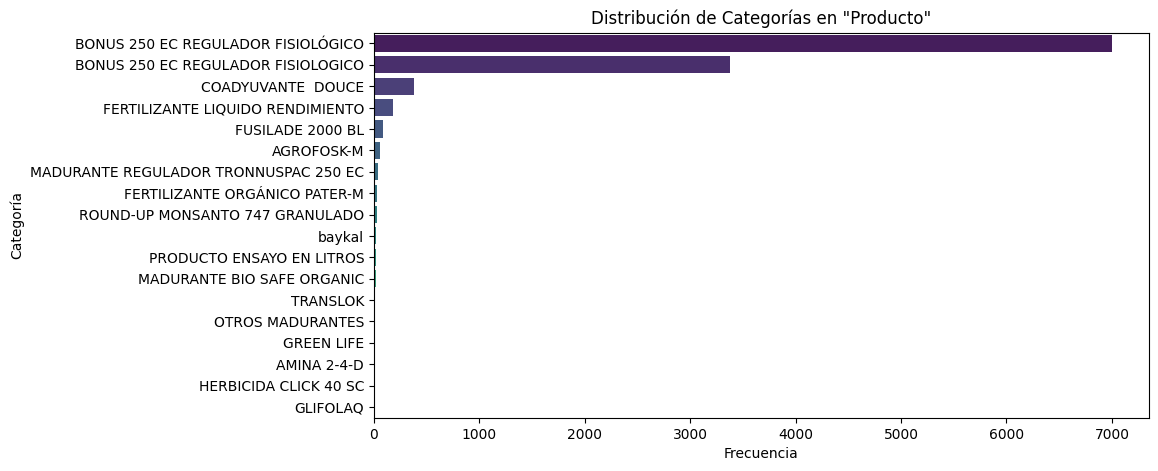



--- An√°lisis de Distribuci√≥n para: 'Codigo Estacion' ---
Conteo de valores (incluyendo nulos):
Codigo Estacion
NaN    14742
999     1749
GUA      894
GIN      748
AMA      708
ROZ      641
MAR      318
YOT      310
AER      282
PLR      135
HON      110
PSJ       98
CAN       95
BUG       80
BLG       51
PTA       17
PRA       16
RIO       15
TUL       12
005        4
008        2
Name: count, dtype: int64




C:\Users\Juan Jose\AppData\Local\Temp\ipykernel_17196\648512961.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[columna], order=df[columna].value_counts().index, palette='viridis')


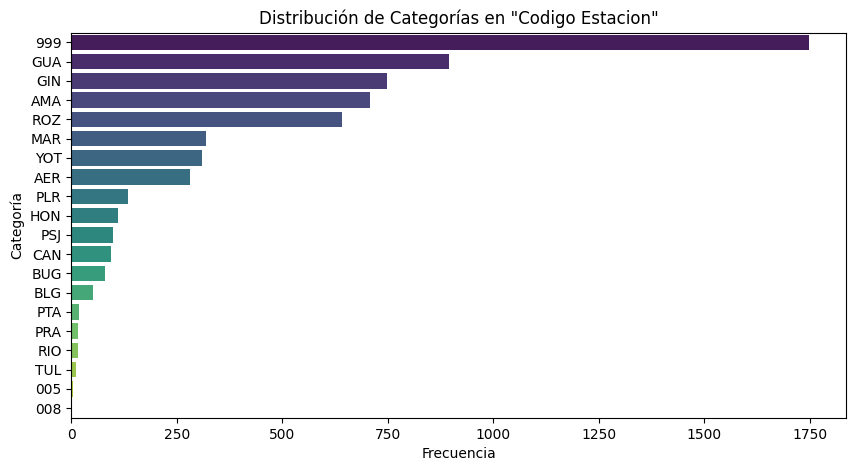

In [13]:
columnas_categoricas = [
    col for col in total_columnas_fase2
    if df[col].dtype == 'object'
]

for columna in columnas_categoricas:
    print(f"--- An√°lisis de Distribuci√≥n para: '{columna}' ---")
    
    # Muestra el conteo de cada categor√≠a, incluyendo los nulos (NaN)
    # Esto es clave para ver el panorama completo.
    print("Conteo de valores (incluyendo nulos):")
    print(df[columna].value_counts(dropna=False))
    print("\n")
    
    # Visualiza la distribuci√≥n con un gr√°fico de barras (countplot)
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[columna], order=df[columna].value_counts().index, palette='viridis')
    plt.title(f'Distribuci√≥n de Categor√≠as en "{columna}"')
    plt.xlabel('Frecuencia')
    plt.ylabel('Categor√≠a')
    plt.show() # Muestra el gr√°fico en la salida de la celda
    print("\n" + "="*50 + "\n")

##### Tratamiento de valores nulos en variables categ√≥ricas

Tras el an√°lisis exploratorio, se identificaron varias columnas categ√≥ricas con valores nulos:

- **`Suelo`**: 18% nulos ‚Üí imputado con la categor√≠a *"Desconocido"*, ya que representa un atributo importante del lote y se evita perder informaci√≥n.
- **`D.S.`**: 66% nulos ‚Üí eliminada. Su naturaleza poco clara por su ausencia en el diccionario de datos y la falta de estandarizaci√≥n hacen que aporte m√°s ruido que valor.
- **`Producto`**: 46% nulos ‚Üí imputado con *"No aplicado"*, dado que los nulos reflejan la ausencia de uso de madurante, lo cual es informaci√≥n relevante.
- **`Codigo Estacion`**: 70% nulos ‚Üí eliminada. La informaci√≥n clim√°tica ya est√° representada en variables m√°s robustas (lluvia, temperatura, humedad).
- **`Cerca de`**: <1% nulos ‚Üí eliminada. Es redundante frente a otras variables geogr√°ficas como *Zona* o *Dist Km*.
- **`Cultivo`**: <0.01% nulos ‚Üí imputado con *"Desconocido"* debido a la baja proporci√≥n de faltantes.

Con estas transformaciones, el dataset queda libre de nulos tanto en variables num√©ricas como categ√≥ricas, permitiendo avanzar hacia el desarrollo de los modelos de regresi√≥n y clasificaci√≥n.


In [14]:
# Imputaciones directamente sobre df
df['Suelo'] = df['Suelo'].fillna("Desconocido")
df['Producto'] = df['Producto'].fillna("No aplicado")
df['Cultivo'] = df['Cultivo'].fillna("Desconocido")

# Eliminaciones
df = df.drop(columns=['D.S.', 'Codigo Estacion', 'Cerca de'])

# Verificaci√≥n final
print("Nulos restantes por columna:")
print(df.isnull().sum().sort_values(ascending=False).head(15))

Nulos restantes por columna:
Ult.Riego              12557
Fec.Madur.              9775
Fosfato Jugo            1858
%Sac.Muestreadora       1858
%Fibra Ca√±a             1858
%ME Min                 1722
%ME Tot                 1720
%ME Veg                 1720
Sac.Ca√±a Precosecha     1098
KATRHM                   522
%ATR                     522
%Sac.Ca√±a                449
Pureza                   269
Brix                     267
Rdto                     267
dtype: int64


---

#### **Fase 3: Imputaci√≥n Simple o Eliminaci√≥n de Filas (< 10% de Nulos)**
Finalmente, las columnas con un bajo porcentaje de datos faltantes (< 10%), como `Dist Km`, `Ton.Azucar`, y `Rdto`, son las m√°s sencillas de tratar. El impacto de la imputaci√≥n o eliminaci√≥n es m√≠nimo.

* **Acci√≥n:** Para estas variables, se utilizar√° una imputaci√≥n por la **media** (si la distribuci√≥n es sim√©trica) o la **mediana**. Dado el bajo n√∫mero de filas afectadas, la **eliminaci√≥n directa de los registros** que contienen estos nulos es tambi√©n una opci√≥n viable y limpia que se considerar√°.

El objetivo de este plan es limpiar y consolidar el dataset de manera met√≥dica, maximizando la retenci√≥n de informaci√≥n √∫til mientras se asegura la robustez y fiabilidad de los datos para el modelado predictivo.

In [15]:
# Calcular el umbral del 10%
total_filas = len(df)
umbral_10_porciento = total_filas * 0.10

# Filtrar columnas num√©ricas con nulos por debajo del umbral
columnas_fase3 = [
    col for col in df.columns
    if (df[col].isnull().sum() > 0) and \
       (df[col].isnull().sum() < umbral_10_porciento) and \
       (df[col].dtype in ['int64', 'float64'])
]

if not columnas_fase3:
    print("üéâ ¬°No hay columnas num√©ricas con menos del 10% de nulos por tratar!")
else:
    print(f"Se analizar√°n {len(columnas_fase3)} columnas en la Fase 3:")
    df[columnas_fase3].info()

Se analizar√°n 20 columnas en la Fase 3:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Tenencia             21026 non-null  float64
 1   Dist Km              21022 non-null  float64
 2   Cod. T.Cultivo       21025 non-null  float64
 3   Dosis Madurante      20923 non-null  float64
 4   Ton.Azucar           20786 non-null  float64
 5   Rdto                 20760 non-null  float64
 6   TAH                  20786 non-null  float64
 7   TAHM                 20786 non-null  float64
 8   Sac.Ca√±a Precosecha  19929 non-null  float64
 9   %Sac.Ca√±a            20578 non-null  float64
 10  %Sac.Muestreadora    19169 non-null  float64
 11  %ATR                 20505 non-null  float64
 12  KATRHM               20505 non-null  float64
 13  %Fibra Ca√±a          19169 non-null  float64
 14  %ME Min              19305 non-null  float

--- An√°lisis de 'Tenencia' ---
  - Nulos: 1 (0.00%)
  - Asimetr√≠a (Skewness): 0.04
  - Media: 46.45
  - Mediana: 51.00


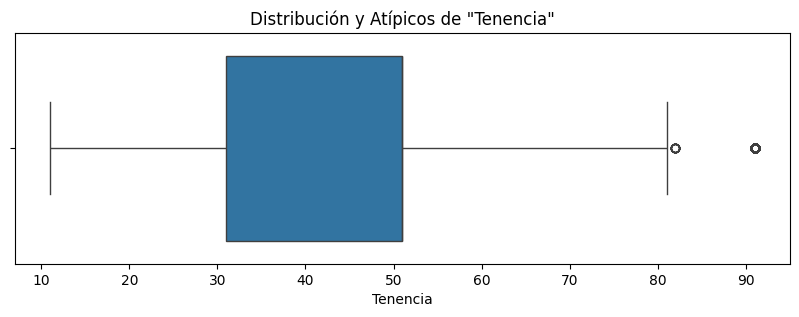



--- An√°lisis de 'Dist Km' ---
  - Nulos: 5 (0.02%)
  - Asimetr√≠a (Skewness): 1.81
  - Media: 25.31
  - Mediana: 21.90


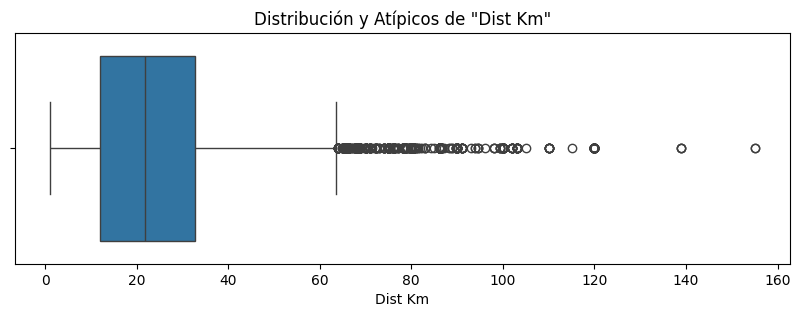



--- An√°lisis de 'Cod. T.Cultivo' ---
  - Nulos: 2 (0.01%)
  - Asimetr√≠a (Skewness): 4.97
  - Media: 1.04
  - Mediana: 1.00


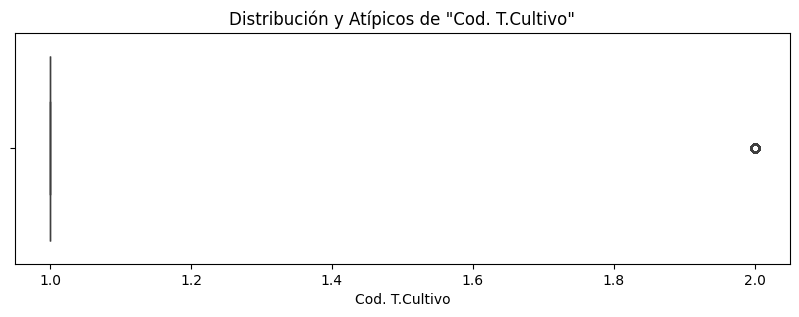



--- An√°lisis de 'Dosis Madurante' ---
  - Nulos: 104 (0.49%)
  - Asimetr√≠a (Skewness): 0.34
  - Media: 0.54
  - Mediana: 0.60


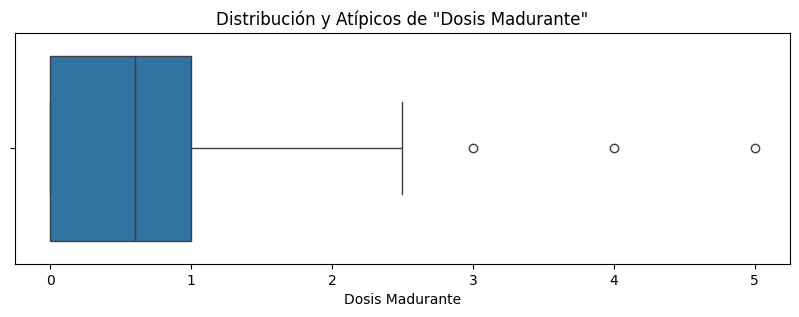



--- An√°lisis de 'Ton.Azucar' ---
  - Nulos: 241 (1.15%)
  - Asimetr√≠a (Skewness): 1.75
  - Media: 124.25
  - Mediana: 93.74


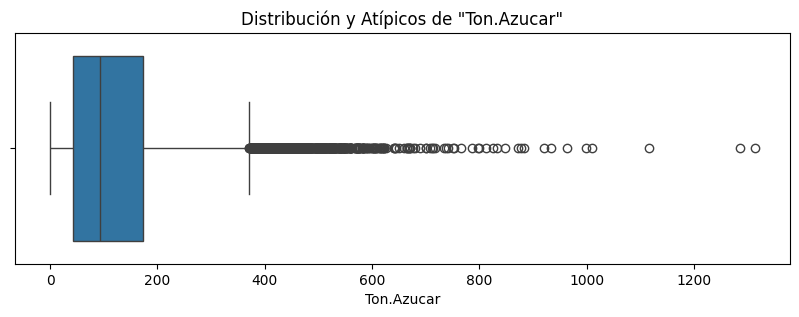



--- An√°lisis de 'Rdto' ---
  - Nulos: 267 (1.27%)
  - Asimetr√≠a (Skewness): -3.20
  - Media: 10.73
  - Mediana: 10.89


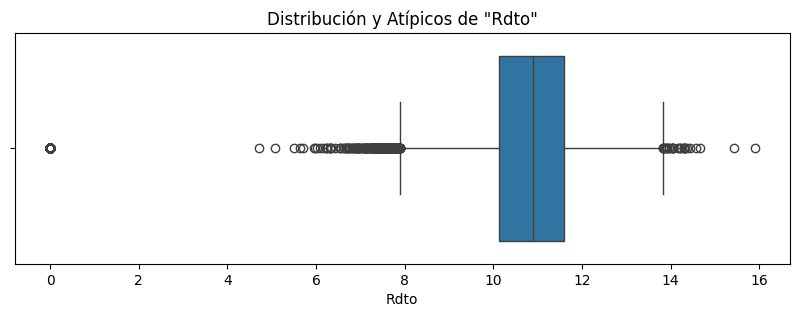



--- An√°lisis de 'TAH' ---
  - Nulos: 241 (1.15%)
  - Asimetr√≠a (Skewness): -0.18
  - Media: 13.89
  - Mediana: 14.01


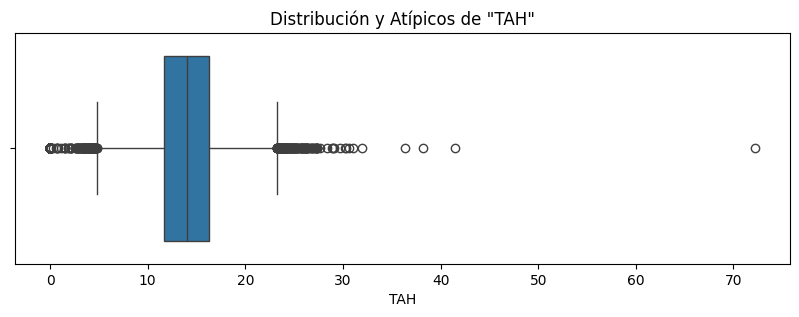



--- An√°lisis de 'TAHM' ---
  - Nulos: 241 (1.15%)
  - Asimetr√≠a (Skewness): -0.20
  - Media: 1.07
  - Mediana: 1.09


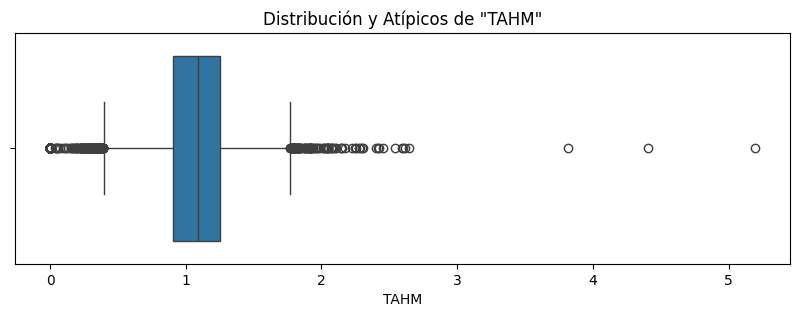



--- An√°lisis de 'Sac.Ca√±a Precosecha' ---
  - Nulos: 1098 (5.22%)
  - Asimetr√≠a (Skewness): 0.20
  - Media: 7.80
  - Mediana: 0.00


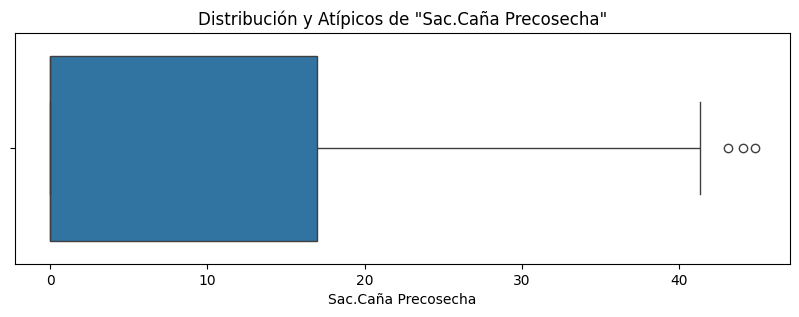



--- An√°lisis de '%Sac.Ca√±a' ---
  - Nulos: 449 (2.14%)
  - Asimetr√≠a (Skewness): -0.26
  - Media: 12.32
  - Mediana: 12.37


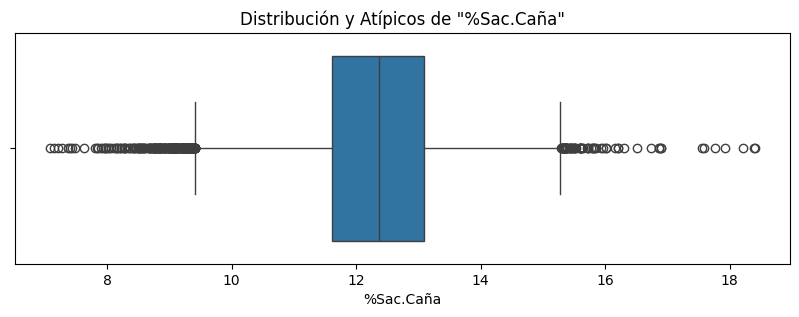



--- An√°lisis de '%Sac.Muestreadora' ---
  - Nulos: 1858 (8.84%)
  - Asimetr√≠a (Skewness): -3.65
  - Media: 12.83
  - Mediana: 13.05


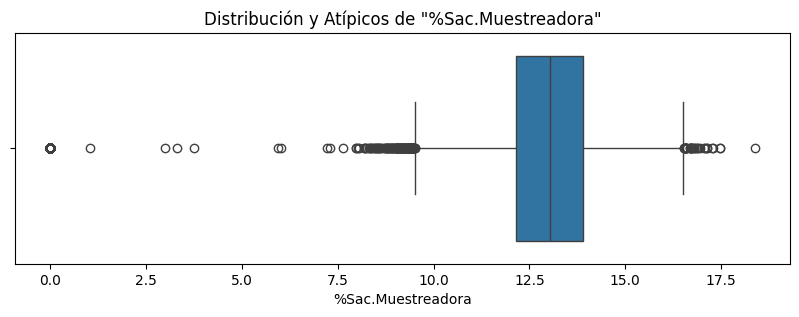



--- An√°lisis de '%ATR' ---
  - Nulos: 522 (2.48%)
  - Asimetr√≠a (Skewness): 35.51
  - Media: 13.72
  - Mediana: 13.75


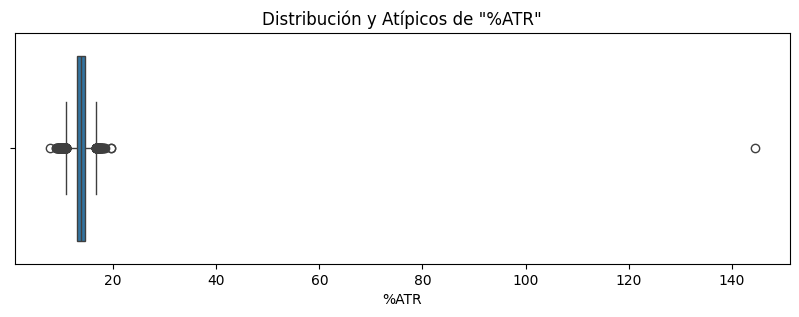



--- An√°lisis de 'KATRHM' ---
  - Nulos: 522 (2.48%)
  - Asimetr√≠a (Skewness): 3.39
  - Media: 1372.45
  - Mediana: 1383.49


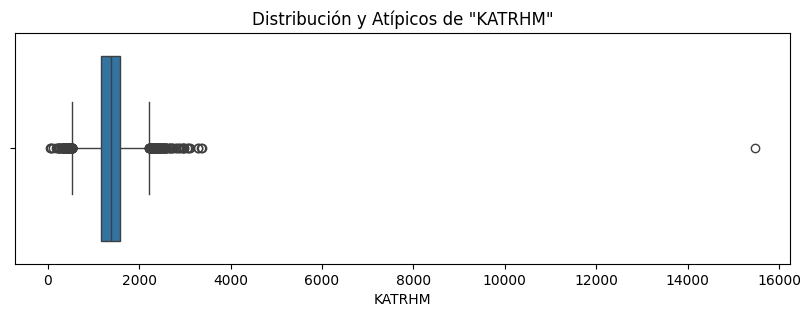



--- An√°lisis de '%Fibra Ca√±a' ---
  - Nulos: 1858 (8.84%)
  - Asimetr√≠a (Skewness): -2.76
  - Media: 15.28
  - Mediana: 15.31


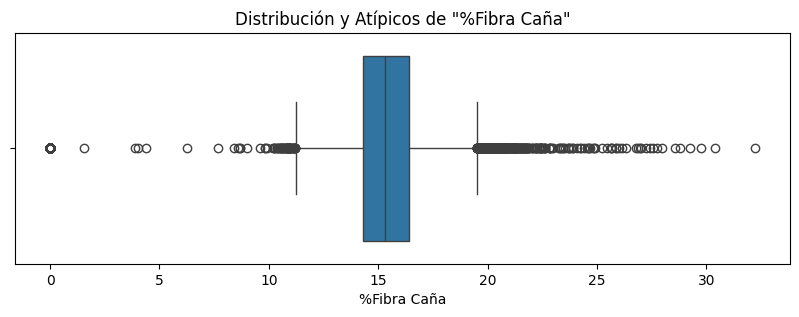



--- An√°lisis de '%ME Min' ---
  - Nulos: 1722 (8.19%)
  - Asimetr√≠a (Skewness): 4.28
  - Media: 0.64
  - Mediana: 0.34


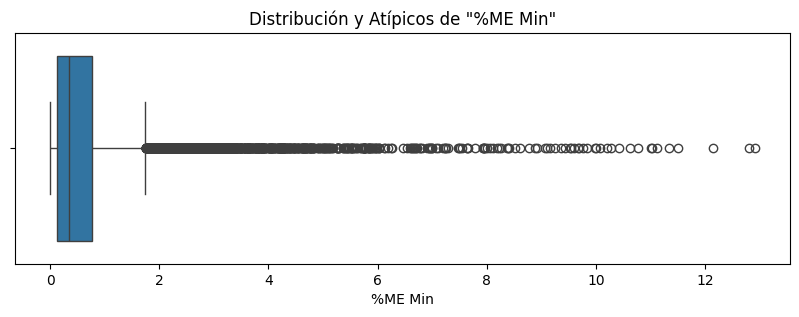



--- An√°lisis de '%ME Veg' ---
  - Nulos: 1720 (8.18%)
  - Asimetr√≠a (Skewness): 21.55
  - Media: 7.76
  - Mediana: 8.09


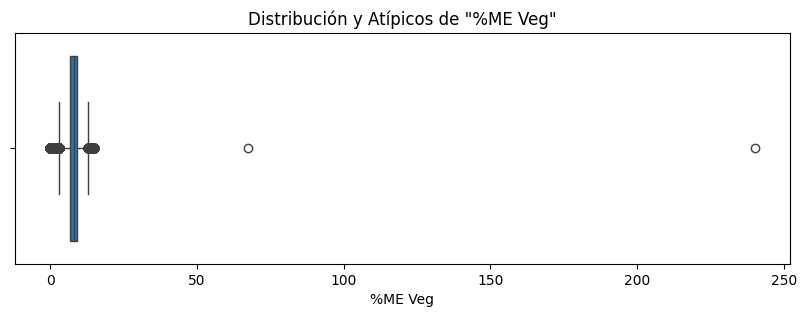



--- An√°lisis de '%ME Tot' ---
  - Nulos: 1720 (8.18%)
  - Asimetr√≠a (Skewness): 0.48
  - Media: 8.60
  - Mediana: 8.67


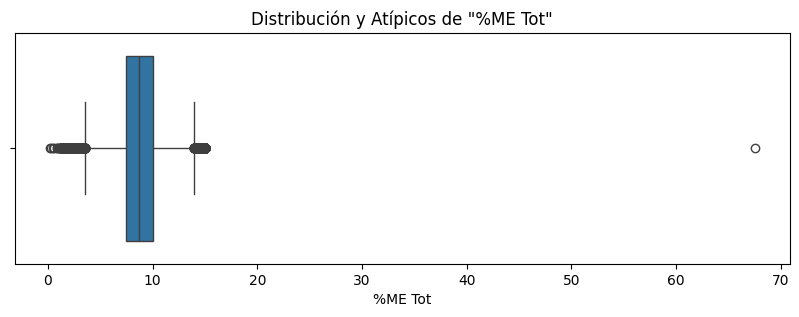



--- An√°lisis de 'Brix' ---
  - Nulos: 267 (1.27%)
  - Asimetr√≠a (Skewness): -2.58
  - Media: 13.13
  - Mediana: 14.31


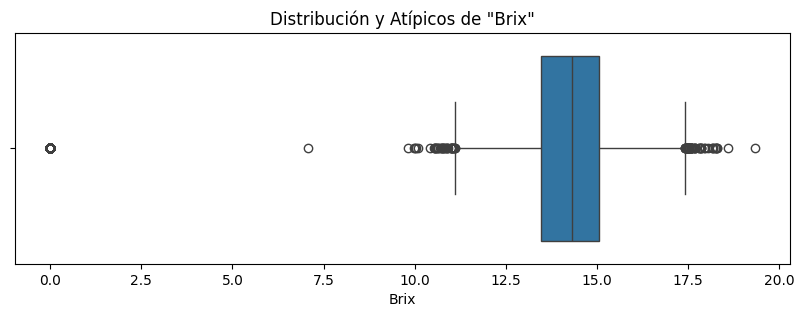



--- An√°lisis de 'Pureza' ---
  - Nulos: 269 (1.28%)
  - Asimetr√≠a (Skewness): -2.83
  - Media: 77.81
  - Mediana: 85.53


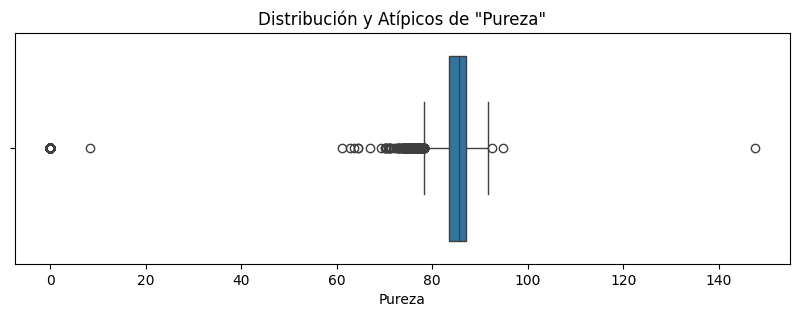



--- An√°lisis de 'Fosfato Jugo' ---
  - Nulos: 1858 (8.84%)
  - Asimetr√≠a (Skewness): 74.03
  - Media: 332.50
  - Mediana: 289.00


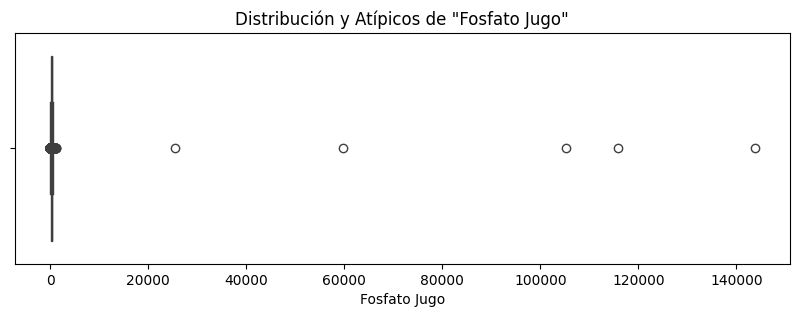

In [16]:
# Iteramos sobre cada columna identificada para la Fase 3
for columna in columnas_fase3:
    # --- C√°lculo de estad√≠sticas ---
    asimetria = df[columna].skew()
    media = df[columna].mean()
    mediana = df[columna].median()
    
    print(f"--- An√°lisis de '{columna}' ---")
    print(f"  - Nulos: {df[columna].isnull().sum()} ({df[columna].isnull().sum() / len(df) * 100:.2f}%)")
    print(f"  - Asimetr√≠a (Skewness): {asimetria:.2f}")
    print(f"  - Media: {media:.2f}")
    print(f"  - Mediana: {mediana:.2f}")
    
    # --- Visualizaci√≥n del Boxplot ---
    plt.figure(figsize=(10, 3)) # Crea una figura nueva para cada gr√°fico
    sns.boxplot(x=df[columna])
    plt.title(f'Distribuci√≥n y At√≠picos de "{columna}"')
    plt.show() # Muestra el gr√°fico en la salida de la celda
    print("\n") # Agrega un espacio para mayor claridad

In [17]:
# Listas para clasificar las columnas
columnas_para_mediana_f3 = []
columnas_para_media_f3 = []

# Umbral de asimetr√≠a para decidir
umbral_asimetria = 1.0

# Clasificamos cada columna bas√°ndonos en su asimetr√≠a
for columna in columnas_fase3:
    asimetria = df[columna].skew()
    
    if abs(asimetria) > umbral_asimetria:
        columnas_para_mediana_f3.append(columna)
    else:
        columnas_para_media_f3.append(columna)

print("--- Clasificaci√≥n Final para Imputaci√≥n (Fase 3) ---")
print(f"‚úÖ Columnas a imputar con MEDIANA (distribuci√≥n asim√©trica):")
print(f"   {columnas_para_mediana_f3}")
print(f"\n‚úÖ Columnas a imputar con MEDIA (distribuci√≥n sim√©trica):")
print(f"   {columnas_para_media_f3}")

--- Clasificaci√≥n Final para Imputaci√≥n (Fase 3) ---
‚úÖ Columnas a imputar con MEDIANA (distribuci√≥n asim√©trica):
   ['Dist Km', 'Cod. T.Cultivo', 'Ton.Azucar', 'Rdto', '%Sac.Muestreadora', '%ATR', 'KATRHM', '%Fibra Ca√±a', '%ME Min', '%ME Veg', 'Brix', 'Pureza', 'Fosfato Jugo']

‚úÖ Columnas a imputar con MEDIA (distribuci√≥n sim√©trica):
   ['Tenencia', 'Dosis Madurante', 'TAH', 'TAHM', 'Sac.Ca√±a Precosecha', '%Sac.Ca√±a', '%ME Tot']


In [18]:
# Imputar con la MEDIANA
if columnas_para_mediana_f3:
    mediana_imputacion = df[columnas_para_mediana_f3].median()
    df[columnas_para_mediana_f3] = df[columnas_para_mediana_f3].fillna(mediana_imputacion)
    print("-> Valores nulos imputados con la MEDIANA.")

# Imputar con la MEDIA
if columnas_para_media_f3:
    media_imputacion = df[columnas_para_media_f3].mean()
    df[columnas_para_media_f3] = df[columnas_para_media_f3].fillna(media_imputacion)
    print("-> Valores nulos imputados con la MEDIA.")

df[columnas_para_mediana_f3].info()
df[columnas_para_media_f3].info()


-> Valores nulos imputados con la MEDIANA.
-> Valores nulos imputados con la MEDIA.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dist Km            21027 non-null  float64
 1   Cod. T.Cultivo     21027 non-null  float64
 2   Ton.Azucar         21027 non-null  float64
 3   Rdto               21027 non-null  float64
 4   %Sac.Muestreadora  21027 non-null  float64
 5   %ATR               21027 non-null  float64
 6   KATRHM             21027 non-null  float64
 7   %Fibra Ca√±a        21027 non-null  float64
 8   %ME Min            21027 non-null  float64
 9   %ME Veg            21027 non-null  float64
 10  Brix               21027 non-null  float64
 11  Pureza             21027 non-null  float64
 12  Fosfato Jugo       21027 non-null  float64
dtypes: float64(13)
memory usage: 2.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIn

### RE-CHEQUEO Datos nulos

In [19]:
# 1. Identifica las variables o columnas en el dataset con valores nulos
columnas_con_nulos = [
    (columna, df[columna].isnull().sum())
    for columna in df.columns
    if df[columna].isnull().sum() > 0
]
# 2. Convertir la lista a un DataFrame de pandas para una mejor visualizaci√≥n
df_nulos = pd.DataFrame(columnas_con_nulos, columns=['Columna', 'Cantidad de Nulos'])

# Ordenar los resultados de mayor a menor
df_nulos_ordenado = df_nulos.sort_values(by='Cantidad de Nulos', ascending=False)


# Imprimir el DataFrame resultante
print("\nResultados en una tabla ordenada de mayor a menor:")
df_nulos_ordenado


Resultados en una tabla ordenada de mayor a menor:


Columna  Cantidad de Nulos
0   Ult.Riego              12557
1  Fec.Madur.               9775

#### Tratamiento de columnas de fecha con valores nulos

En el an√°lisis final de nulos se identificaron dos columnas con una alta proporci√≥n de valores faltantes:

- **`Ult.Riego`** ‚Üí 12,557 nulos (~60%)
- **`Fec.Madur.`** ‚Üí 9,775 nulos (~46%)

Ambas variables corresponden a **fechas** (`datetime`). Aunque en teor√≠a podr√≠an transformarse en variables derivadas (por ejemplo, *d√≠as desde el √∫ltimo riego* o *d√≠as hasta la madurez*), presentan dos limitaciones importantes:

1. **Alto porcentaje de nulos**: m√°s del 40% de los registros carecen de esta informaci√≥n, lo que implicar√≠a una imputaci√≥n masiva y poco confiable.
2. **Complejidad de integraci√≥n**: para ser √∫tiles en un modelo de regresi√≥n, las fechas deben convertirse en variables num√©ricas. Sin embargo, la heterogeneidad en los registros y la cantidad de valores faltantes dificultan la generaci√≥n de indicadores consistentes.

Por estos motivos, se decidi√≥ **eliminar ambas columnas del dataset**. Esta decisi√≥n mantiene la integridad del conjunto de datos y evita introducir sesgos o ruido en el modelo. En fases posteriores, si se cuenta con informaci√≥n m√°s completa, podr√≠an explorarse variables derivadas relacionadas con el riego y la maduraci√≥n.

In [20]:
# Eliminamos columnas de fechas con demasiados nulos
df = df.drop(columns=['Ult.Riego', 'Fec.Madur.'])

# Verificaci√≥n final de nulos
print("Nulos restantes por columna:")
print(df.isnull().sum().sort_values(ascending=False).head(15))


Nulos restantes por columna:
Per√≠odo              0
Hacienda             0
%Sac.Ca√±a            0
%Sac.Muestreadora    0
%ATR                 0
KATRHM               0
%Fibra Ca√±a          0
%AR Jugo             0
%ME Min              0
%ME Veg              0
%ME Tot              0
Brix                 0
Pureza               0
Vejez                0
Tipo Quema           0
dtype: int64


Adem√°s de `Ult.Riego` y `Fec.Madur.`, se identificaron dos variables adicionales de tipo fecha:
- **`F.Siembra`** (fecha de siembra)
- **`F.Ult.Corte`** (fecha del √∫ltimo corte)

Ambas fueron eliminadas por las siguientes razones:
1. Los modelos de regresi√≥n lineal no pueden trabajar directamente con variables de tipo fecha.
2. La informaci√≥n que podr√≠an aportar ya est√° representada en variables num√©ricas derivadas, como `Edad Ult Cos`, `Edad.Precosecha` y `Per√≠odo`.
3. Mantenerlas sin transformar no aportar√≠a valor predictivo y aumentar√≠a la complejidad innecesaria del dataset.

Con esta decisi√≥n, el dataset final queda compuesto √∫nicamente por variables num√©ricas y categ√≥ricas ya tratadas, lo que asegura consistencia para el modelado.

In [21]:
# Eliminamos columnas de fecha que no ser√°n transformadas
df = df.drop(columns=['F.Siembra', 'F.Ult.Corte'])

print("Columnas finales despu√©s de eliminar fechas:")
print(df.columns.tolist())

Columnas finales despu√©s de eliminar fechas:
['Per√≠odo', 'Hacienda', 'Nombre', 'Zona', 'Tenencia', 'Suerte', 'Suelo', 'Area Neta', 'Dist Km', 'Variedad', 'Cod.Estado #', 'Cod.Estado', 'Edad Ult Cos', 'Destino 1=Semilla', 'Cod. T.Cultivo', 'Cultivo', 'Producto', 'Dosis Madurante', 'Semanas mad.', 'TonUltCorte', 'TCH', 'TCHM', 'Ton.Azucar', 'Rdto', 'TAH', 'TAHM', 'Sac.Ca√±a Precosecha', 'Edad.Precosecha', '%Sac.Ca√±a', '%Sac.Muestreadora', '%ATR', 'KATRHM', '%Fibra Ca√±a', '%AR Jugo', '%ME Min', '%ME Veg', '%ME Tot', 'Brix', 'Pureza', 'Vejez', 'Tipo Quema', 'T.Corte', 'Cosech√≥', 'Num.Riegos', 'M3 Riego', 'DDUlt.Riego', 'Lluvias (2 Meses Ant.)', 'Lluvias Ciclo', 'Lluvias 0 -3', 'Lluvias tres a seis', 'Lluvias seis a nueve', 'Luvias 9 -FC', '%Infest.Diatrea', 'Fosfato Jugo']


### Analisis Bivariado

In [22]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("\nVariables Num√©ricas:", numerical_cols)
print("Variables Categ√≥ricas:", categorical_cols)


Variables Num√©ricas: ['Per√≠odo', 'Hacienda', 'Tenencia', 'Area Neta', 'Dist Km', 'Cod.Estado #', 'Edad Ult Cos', 'Destino 1=Semilla', 'Cod. T.Cultivo', 'Dosis Madurante', 'Semanas mad.', 'TonUltCorte', 'TCH', 'TCHM', 'Ton.Azucar', 'Rdto', 'TAH', 'TAHM', 'Sac.Ca√±a Precosecha', 'Edad.Precosecha', '%Sac.Ca√±a', '%Sac.Muestreadora', '%ATR', 'KATRHM', '%Fibra Ca√±a', '%AR Jugo', '%ME Min', '%ME Veg', '%ME Tot', 'Brix', 'Pureza', 'Vejez', 'Num.Riegos', 'M3 Riego', 'DDUlt.Riego', 'Lluvias (2 Meses Ant.)', 'Lluvias Ciclo', 'Lluvias 0 -3', 'Lluvias tres a seis', 'Lluvias seis a nueve', 'Luvias 9 -FC', '%Infest.Diatrea', 'Fosfato Jugo']
Variables Categ√≥ricas: ['Nombre', 'Zona', 'Suerte', 'Suelo', 'Variedad', 'Cod.Estado', 'Cultivo', 'Producto', 'Tipo Quema', 'T.Corte', 'Cosech√≥']


#### Matriz de correlaci√≥n

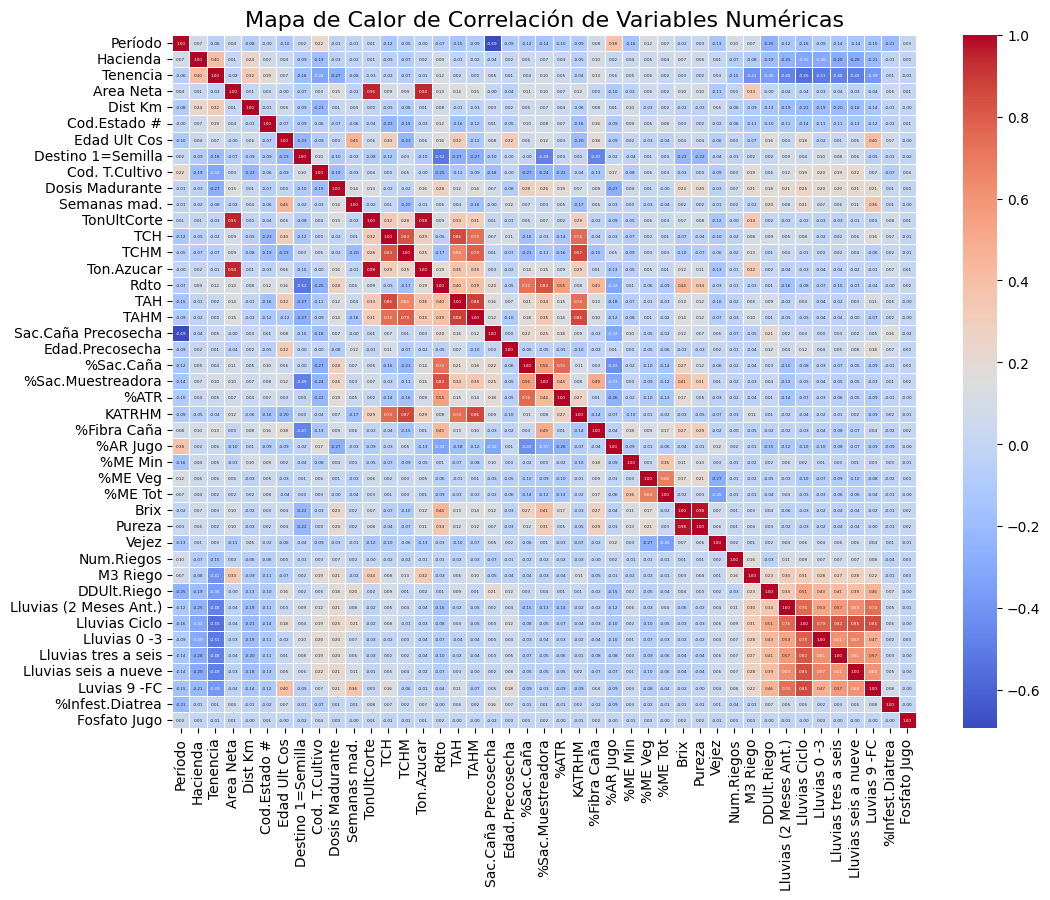

In [23]:
# Calcular la matriz de correlaci√≥n
correlation_matrix = df[numerical_cols].corr()

# Configurar el tama√±o de la figura
plt.figure(figsize=(12, 9))

# Crear el mapa de calor con Seaborn
sns.heatmap(
    correlation_matrix,
    annot=True,          # Mostrar los valores de correlaci√≥n en las celdas
    cmap='coolwarm',     # Esquema de colores
    fmt=".2f",           # Formato de los n√∫meros (2 decimales)
    linewidths=.5,
    annot_kws={'size': 3}
)

plt.title('Mapa de Calor de Correlaci√≥n de Variables Num√©ricas', fontsize=16)
plt.show()

#### Optimizaci√≥n de la Matriz de Correlaci√≥n

La matriz de correlaci√≥n inicial, que inclu√≠a todas las variables num√©ricas, result√≥ ser demasiado densa para una interpretaci√≥n efectiva debido a la alta dimensionalidad del dataset.

Para optimizar el an√°lisis, se implement√≥ un filtrado para seleccionar √∫nicamente las variables que presentaban una correlaci√≥n sustancial (valor absoluto > 0.5) con al menos otra variable.

La generaci√≥n de un segundo mapa de calor con este subconjunto de variables permite una visualizaci√≥n m√°s clara y eficiente que centra el an√°lisis en las interrelaciones de mayor relevancia estad√≠stica, facilitando la detecci√≥n de patrones y la identificaci√≥n de multicolinealidad para el modelado predictivo.
De igual manera, para efectos practicos se deja el grafico anterior completo en caso de querer observar relaciones que pudieron desaparecer con el filtro aplicado

Variables originales: ['Per√≠odo', 'Hacienda', 'Tenencia', 'Area Neta', 'Dist Km', 'Cod.Estado #', 'Edad Ult Cos', 'Destino 1=Semilla', 'Cod. T.Cultivo', 'Dosis Madurante', 'Semanas mad.', 'TonUltCorte', 'TCH', 'TCHM', 'Ton.Azucar', 'Rdto', 'TAH', 'TAHM', 'Sac.Ca√±a Precosecha', 'Edad.Precosecha', '%Sac.Ca√±a', '%Sac.Muestreadora', '%ATR', 'KATRHM', '%Fibra Ca√±a', '%AR Jugo', '%ME Min', '%ME Veg', '%ME Tot', 'Brix', 'Pureza', 'Vejez', 'Num.Riegos', 'M3 Riego', 'DDUlt.Riego', 'Lluvias (2 Meses Ant.)', 'Lluvias Ciclo', 'Lluvias 0 -3', 'Lluvias tres a seis', 'Lluvias seis a nueve', 'Luvias 9 -FC', '%Infest.Diatrea', 'Fosfato Jugo']
Variables con correlaciones fuertes (>0.5): ['Per√≠odo', 'Tenencia', 'Area Neta', 'Destino 1=Semilla', 'TonUltCorte', 'TCH', 'TCHM', 'Ton.Azucar', 'Rdto', 'TAH', 'TAHM', 'Sac.Ca√±a Precosecha', '%Sac.Ca√±a', '%Sac.Muestreadora', '%ATR', 'KATRHM', '%ME Veg', '%ME Tot', 'Brix', 'Pureza', 'DDUlt.Riego', 'Lluvias (2 Meses Ant.)', 'Lluvias Ciclo', 'Lluvias 0 -3', '

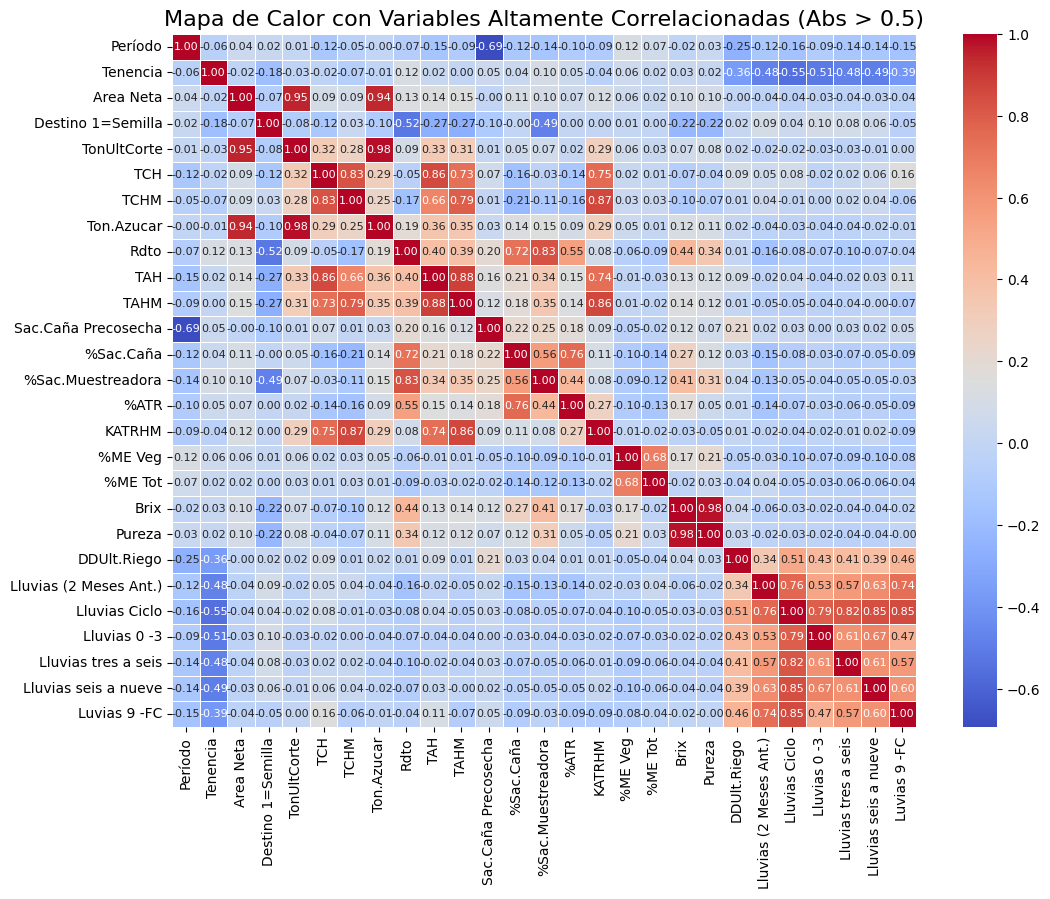

In [24]:
correlation_matrix_full = df[numerical_cols].corr()

abs_corr_matrix = correlation_matrix_full.abs()
np.fill_diagonal(abs_corr_matrix.values, 0)

has_strong_correlation = (abs_corr_matrix > 0.5).any()
cols_to_keep = has_strong_correlation[has_strong_correlation].index.tolist()

print(f"Variables originales: {numerical_cols}")
print(f"Variables con correlaciones fuertes (>0.5): {cols_to_keep}")

df_filtered = df[cols_to_keep]
correlation_matrix_filtered = df_filtered.corr()

plt.figure(figsize=(12, 9))

sns.heatmap(
    correlation_matrix_filtered,
    annot=True,          
    cmap='coolwarm',     
    fmt=".2f",           
    linewidths=.5,
    annot_kws={'size': 8}
)

plt.title('Mapa de Calor con Variables Altamente Correlacionadas (Abs > 0.5)', fontsize=16)
plt.show()

#### An√°lisis Detallado de Correlaciones Fuertes

A continuaci√≥n se realizara un analisis que desglosa las relaciones estad√≠sticas para traducirlas en conocimiento agron√≥mico y operativo, con un enfoque claro en los objetivos de predecir **TCH** y **%Sac.Ca√±a**.

##### 1. Correlaciones de Producci√≥n y Tama√±o del Lote

Estas correlaciones son las m√°s fuertes y, en su mayor√≠a, confirman la consistencia y l√≥gica de los datos.

* `Area Neta y TonUltCorte: 0.95`
* `Area Neta y Ton.Azucar: 0.94`
* `TonUltCorte y Ton.Azucar: 0.98`

**An√°lisis Detallado:**

* **Interpretaci√≥n:** Estas correlaciones son casi perfectas y reflejan una relaci√≥n casi determinista. `TonUltCorte` (Toneladas totales del √∫ltimo corte) es el producto del rendimiento (`TCH`) y el `Area Neta`. Por lo tanto, a mayor √°rea, es l√≥gico esperar una mayor producci√≥n total de ca√±a. De manera similar, `Ton.Azucar` es el resultado de multiplicar las toneladas de ca√±a (`TonUltCorte`) por el rendimiento industrial (`Rdto`).
* **Significado Agron√≥mico:** Esto valida la integridad de los datos. Si un lote m√°s grande no produjera m√°s toneladas de ca√±a y az√∫car, existiria un serio problema de medici√≥n o registro.
* **Implicaciones para el Modelo de ML:**
    * Estas variables no deben usarse como predictoras directas para `TCH`. Por ejemplo, `TonUltCorte` se calcula a partir de `TCH` (`TCH = TonUltCorte / Area Neta`). Usar `TonUltCorte` o `Area Neta` para predecir `TCH` ser√≠a un error, ya que el modelo aprender√≠a una simple f√≥rmula matem√°tica en lugar de patrones agron√≥micos complejos.
    * Son variables de resultado, no de proceso. Sirven para calcular los KPIs finales, pero no explican *por qu√©* un lote tuvo un rendimiento espec√≠fico.

---

##### 2. Correlaciones entre M√©tricas de Rendimiento (Productividad)

Este grupo muestra c√≥mo las diferentes formas de medir la productividad agr√≠cola e industrial est√°n interrelacionadas.

* `TCH y TCHM: 0.83`
* `TCH y TAH: 0.86`
* `TCH y TAHM: 0.73`
* `TCH y KATRHM: 0.75`
* `TCHM y TAH: 0.66`
* `TCHM y TAHM: 0.79`
* `TCHM y KATRHM: 0.87`
* `TAH y TAHM: 0.88`
* `TAH y KATRHM: 0.74`
* `TAHM y KATRHM: 0.86`

*(Suposici√≥n de acr√≥nimos: TCHM = TCH Medido/Muestreado, TAH = Toneladas de Az√∫car por Hect√°rea, TAHM = TAH Medido/Muestreado, KATRHM = Kilos de ATR por Hect√°rea Medido)*

**An√°lisis Detallado:**

* **Interpretaci√≥n:** Existe una fuerte consistencia entre todas las m√©tricas de rendimiento por hect√°rea. `TCH` (Toneladas de Ca√±a/Ha) es la base. `TAH` (Toneladas de Az√∫car/Ha) es probablemente el resultado de multiplicar `TCH` por la calidad (`Rdto` o `%Sac.Ca√±a`). Por lo tanto, un `TCH` alto generalmente conduce a un `TAH` alto, a menos que la calidad de la ca√±a sea excepcionalmente baja.
* **Significado Agron√≥mico:** Estas correlaciones demuestran que, en general, los factores que favorecen un alto volumen de biomasa (ca√±a) tambi√©n favorecen una alta producci√≥n de az√∫car por superficie. El objetivo agron√≥mico es maximizar ambos simult√°neamente. La correlaci√≥n `TCHM y KATRHM: 0.87` es particularmente fuerte, indicando que las mediciones de campo (muestreadas) son muy buen indicativo del rendimiento final de az√∫cares recuperables.
* **Implicaciones para el Modelo de ML:**
    * Al igual que en el punto anterior, estas variables son **variables objetivo o derivadas del objetivo**. No se pueden usar como predictoras entre s√≠ para explicar las causas del rendimiento. Por ejemplo, no se puede usar `TAH` para predecir `TCH`.
    * La elecci√≥n de la variable objetivo principal (`TCH`) es correcta. Las otras son m√©tricas de resultado que se pueden calcular posteriormente o modelar por separado si es necesario.

---

##### 3. Correlaciones entre M√©tricas de Calidad del Jugo y Rendimiento Industrial

Este grupo es crucial para entender los predictores de la segunda variable objetivo: `%Sac.Ca√±a`.

* `Rdto y %Sac.Ca√±a: 0.72`
* `Rdto y %Sac.Muestreadora: 0.83`
* `Rdto y %ATR: 0.55`
* `%Sac.Ca√±a y %Sac.Muestreadora: 0.56`
* `%Sac.Ca√±a y %ATR: 0.76`
* `Brix y Pureza: 0.98`

**An√°lisis Detallado:**

* **Interpretaci√≥n:**
    * `Brix y Pureza (0.98)`: Esta correlaci√≥n casi perfecta es esperada. El **Brix** mide el total de s√≥lidos disueltos en el jugo (az√∫cares y no az√∫cares). La **Pureza** es el porcentaje de sacarosa dentro de esos s√≥lidos totales. Una alta concentraci√≥n de s√≥lidos (Brix alto) en una ca√±a madura est√° casi siempre acompa√±ada de una alta proporci√≥n de sacarosa (Pureza alta). Es una validaci√≥n de la calidad de la medici√≥n.
    * Las correlaciones entre `Rdto` (Rendimiento industrial), `%Sac.Ca√±a`, `%Sac.Muestreadora` y `%ATR` son muy fuertes. Esto es l√≥gico: `%Sac.Ca√±a` es el componente principal del `Rdto` y del `%ATR` (Az√∫cares Totales Recuperables). Cuanta m√°s sacarosa tenga la ca√±a que entra al ingenio, m√°s eficiente ser√° el proceso de extracci√≥n y mayor ser√° el rendimiento final de az√∫car.
    * La correlaci√≥n `Rdto y %Sac.Muestreadora (0.83)` es m√°s alta que con `%Sac.Ca√±a (0.72)`, lo cual sugiere que la medici√≥n en la muestreadora (`desfibradora`) podr√≠a ser un predictor m√°s directo del rendimiento final en f√°brica que el an√°lisis de sacarosa en campo.
* **Significado Agron√≥mico:** La madurez de la ca√±a es el factor clave aqu√≠. Una ca√±a bien madurada acumula sacarosa, aumentando el Brix, la Pureza, el %Sac.Ca√±a y, consecuentemente, el rendimiento industrial.
* **Implicaciones para el Modelo de ML:**
    * Para predecir `%Sac.Ca√±a`, estas variables (`Rdto`, `%ATR`, `Brix`, `Pureza`) son, de nuevo, **variables de resultado**. No explican las *causas* de la alta sacarosa.
    * Si se tuviera una medici√≥n de `Brix` o `Pureza` *antes* de la cosecha (precosecha), esta ser√≠a un predictor **extremadamente potente** para `%Sac.Ca√±a`.

---

##### 4. Correlaciones Clim√°ticas (Lluvias)

Este es uno de los grupos m√°s importantes, ya que las lluvias son **variables ex√≥genas y predictivas**.

* `Lluvias (2 Meses Ant.) y Lluvias Ciclo: 0.76`
* `Lluvias (2 Meses Ant.) y Lluvias 0 -3: 0.53`
* `Lluvias Ciclo y Lluvias 0 -3: 0.79`
* `Lluvias Ciclo y Lluvias tres a seis: 0.82`
* `Lluvias Ciclo y Lluvias seis a nueve: 0.85`
* `Lluvias Ciclo y Luvias 9 -FC: 0.85`
* ... (y todas las dem√°s correlaciones entre diferentes per√≠odos de lluvia)

**An√°lisis Detallado:**

* **Interpretaci√≥n:** Todas las mediciones de lluvia en diferentes ventanas de tiempo est√°n fuertemente correlacionadas entre s√≠. La variable `Lluvias Ciclo` (que presumiblemente es la lluvia total durante todo el ciclo de vida del cultivo) tiene una correlaci√≥n muy alta con las lluvias en cada uno de los trimestres o per√≠odos intermedios.
* **Significado Agron√≥mico:** Esto indica que los patrones de lluvia son consistentes en la regi√≥n. Si un ciclo de cultivo es lluvioso en general (`Lluvias Ciclo` alta), es muy probable que tambi√©n haya sido lluvioso en sus diferentes etapas (0-3 meses, 3-6 meses, etc.). No parece haber un patr√≥n donde un trimestre es extremadamente seco y otro extremadamente h√∫medo de forma err√°tica; m√°s bien, los a√±os tienden a ser "secos" o "h√∫medos" en su totalidad.
* **Implicaciones para el Modelo de ML:**
    * **Multicolinealidad**  Incluir todas estas variables de lluvia (`Lluvias 0-3`, `Lluvias 3-6`, etc.) en un mismo modelo (especialmente modelos lineales como Regresi√≥n Lineal o Log√≠stica) es una mala pr√°ctica. La multicolinealidad puede hacer que los coeficientes del modelo sean inestables e interpretarlos sea imposible.
    * **Estrategias de Feature Engineering:**
        1.  **Selecci√≥n de Variables:** Podria usarse unicamente la variable m√°s general, `Lluvias Ciclo`, o la que tenga la mayor correlaci√≥n individual con `TCH` o `%Sac.Ca√±a`.
        2.  **Creaci√≥n de Componentes Principales (PCA):** Podr√≠an combinarse todas las variables de lluvia en uno o dos componentes principales que capturen la mayor parte de la varianza (por ejemplo, un componente que represente "humedad general del ciclo").
        3.  **Variables de Interacci√≥n:** Se podrian crear nuevas variables, como la diferencia de lluvia entre el per√≠odo de crecimiento y el de maduraci√≥n, que podr√≠an ser m√°s informativas.

---

##### 5. Correlaciones Mixtas: Manejo, Clima y Calidad

Este grupo final contiene algunas de las correlaciones m√°s interesantes y accionables.

* `Per√≠odo y Sac.Ca√±a Precosecha: 0.69`
    * **An√°lisis:** Suponiendo que `Per√≠odo` se refiere a la edad de la ca√±a en meses o al per√≠odo del a√±o de la cosecha. Esta fuerte correlaci√≥n positiva indica que a medida que el `Per√≠odo` aumenta, la sacarosa medida antes de la cosecha tambi√©n lo hace. Esto es fundamental: **la edad de la ca√±a es un factor clave para la maduraci√≥n y acumulaci√≥n de az√∫cares**. Cortar la ca√±a demasiado joven resultar√° en una baja calidad. Esta es una variable predictiva muy potente para `%Sac.Ca√±a`.

* `Tenencia y Lluvias Ciclo: 0.55` y `Tenencia y Lluvias 0 -3: 0.51`
    * **An√°lisis:**  `Tenencia` probablemente se refiere al tipo de propiedad o contrato de la tierra (propia, arrendada, etc.). Esta correlaci√≥n sugiere que el tipo de tenencia de la tierra est√° asociado con los reg√≠menes de lluvia. **Hip√≥tesis:** Podr√≠a ser que las tierras arrendadas se encuentren en zonas geogr√°ficas diferentes (con m√°s o menos lluvia) que las tierras propias del ingenio. Es una variable que puede estar capturando un **efecto geogr√°fico indirecto**. Para el modelo, `Tenencia` podr√≠a ser un buen predictor si est√° actuando como un proxy de la `Zona` o de condiciones clim√°ticas locales no capturadas por otras variables.

* `Destino 1=Semilla y Rdto: 0.52`
    * **An√°lisis:** Indica que los lotes cuyo destino es ser usados como "semilla" (para plantar nuevos campos) tienden a tener un rendimiento industrial (`Rdto`) m√°s alto. Esto sugiere una **pr√°ctica de selecci√≥n agron√≥mica**: el ingenio elige sus mejores lotes (los m√°s sanos, vigorosos y con alto potencial de sacarosa) para propagar su material gen√©tico. No es que el destino "semilla" *cause* un alto rendimiento, sino que un alto rendimiento *causa* que sea elegido como semilla. Para el modelo, esta variable podr√≠a introducir sesgo si se usa para predecir el rendimiento de lotes comerciales.

* `DDUlt.Riego y Lluvias Ciclo: 0.51`
    * **An√°lisis:** `DDUlt.Riego` probablemente significa "D√≠as desde el √∫ltimo riego". Esta correlaci√≥n positiva indica que en ciclos con m√°s lluvia, los d√≠as desde la √∫ltima aplicaci√≥n de riego tienden a ser m√°s. Esto es perfectamente l√≥gico: **si llueve mucho, no es necesario regar tan frecuentemente**, por lo que el tiempo desde la √∫ltima intervenci√≥n de riego aumenta. Muestra una gesti√≥n del riego que responde a las condiciones clim√°ticas.

* `%ME Veg y %ME Tot: 0.68`
    * **An√°lisis:** Asumiendo que `ME` se refiere a "Materia Extra√±a" y `Veg` a "Vegetal". Esta correlaci√≥n indica que si hay un alto porcentaje de materia extra√±a vegetal (hojas, cogollos), el porcentaje de materia extra√±a total tambi√©n tiende a ser alto. Esto es esperable y apunta a la **calidad de la cosecha**. Una cosecha "sucia" (con muchas hojas) es un problema operativo que afecta la eficiencia en la f√°brica.

### Codificaci√≥n de variables categ√≥ricas y escalado de variables num√©ricas


En esta etapa se transformaron las variables categ√≥ricas mediante **One-Hot Encoding**, creando variables binarias (0/1) para cada categor√≠a.  

- **Eliminadas por ser identificadores:** `Hacienda`, `Nombre`, `Suerte`.  
- **Conservadas como categ√≥ricas:** `Zona`, `Suelo`, `Variedad`, `Cod.Estado`, `Producto`, `Tipo Quema`, `T.Corte`, `Cosech√≥`, `Cultivo`.  

La codificaci√≥n garantiza que los modelos de regresi√≥n lineal puedan interpretar los efectos de estas variables sin imponer un orden arbitrario.  
El dataset resultante (`X_final`) combina las variables num√©ricas originales con las categ√≥ricas codificadas y est√° listo para dividir en conjuntos de entrenamiento y prueba.


In [25]:
# 1. Definir variables predictoras y objetivos
X = df.drop(columns=['TCH', '%Sac.Ca√±a', 'Hacienda', 'Nombre', 'Suerte'])
y_tch = df['TCH']
y_sac = df['%Sac.Ca√±a']

# 2. Identificar columnas categ√≥ricas
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
print("Variables categ√≥ricas:", cat_cols)

# 3. One-hot encoding con versi√≥n nueva de sklearn
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X[cat_cols])

# 4. Convertimos a DataFrame para ver los nombres de las columnas nuevas
encoded_cols = encoder.get_feature_names_out(cat_cols)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_cols, index=X.index)

# 5. Reemplazar categ√≥ricas originales por sus codificadas
X_final = pd.concat([X.drop(columns=cat_cols), X_encoded_df], axis=1)

print("Shape final de X:", X_final.shape)
X_final.head()

Variables categ√≥ricas: ['Zona', 'Suelo', 'Variedad', 'Cod.Estado', 'Cultivo', 'Producto', 'Tipo Quema', 'T.Corte', 'Cosech√≥']
Shape final de X: (21027, 285)


Per√≠odo  Tenencia  Area Neta  Dist Km  Cod.Estado #  Edad Ult Cos  Destino 1=Semilla  Cod. T.Cultivo  Dosis Madurante  Semanas mad.  TonUltCorte       TCHM  Ton.Azucar     Rdto        TAH      TAHM  Sac.Ca√±a Precosecha  Edad.Precosecha  %Sac.Muestreadora     %ATR       KATRHM  %Fibra Ca√±a  %AR Jugo  %ME Min  %ME Veg  %ME Tot     Brix   Pureza   Vejez  Num.Riegos  M3 Riego  DDUlt.Riego  Lluvias (2 Meses Ant.)  Lluvias Ciclo  Lluvias 0 -3  Lluvias tres a seis  Lluvias seis a nueve  Luvias 9 -FC  %Infest.Diatrea  Fosfato Jugo  Zona_IC07  Zona_IP01  Zona_IP02  Zona_IP03  Zona_IP05  Zona_IP06  Zona_ip05  Suelo_AMAIME  Suelo_ARANJUEZ  Suelo_ARGELIA   Suelo_ATENEA  Suelo_BALLESTEROS  Suelo_BRISAS  Suelo_BRITANIA  Suelo_BRITANIA-CHUNDULAR  Suelo_BURRIGA   Suelo_CABA√ëA   Suelo_CANELO  Suelo_CANTARINA  Suelo_CARLINA  Suelo_CERRITO   Suelo_CERRITO-NIMA  Suelo_CHAMBURO  Suelo_CHONTADURO  Suelo_CHUNDULAR  Suelo_COKE   Suelo_CORINTIAS   Suelo_CORINTO   Suelo_Calamar  Suelo_Desbaratado  \
0   201701      51.0       6.00      4.3             5         12.81                  0             1.0              1.0      8.428571       727.19   9.461228      86.050  11.8332  14.341666  1.119567            16.817200        12.360247             13.508  15.1653  1434.823641       16.910      0.84    0.355   10.198   10.553  15.7464  87.2241   2.735         5.0       0.0            0                   258.0         1038.0           0.0                454.0                 102.0         482.0           3.1396         178.0        0.0        0.0        1.0        0.0        0.0        0.0        0.0           0.0             0.0             0.0           0.0                0.0           0.0             0.0                       0.0             0.0            0.0           0.0              1.0            0.0             0.0                 0.0             0.0               0.0              0.0          0.0               0.0             0.0            0.0                0.0   
1   201701      81.0       1.45     21.9             5         11.14                  0             1.0              0.0      8.571428       136.00   8.419488      14.728  10.8294  10.157241  0.911781             7.802876        12.360247             12.551  14.0410  1182.180399       16.936      0.55    2.298    7.273    9.571  15.2240  84.3602  73.823         5.0       0.0            0                     0.0            0.0           0.0                  0.0                   0.0           0.0           3.1396         382.0        0.0        0.0        0.0        0.0        1.0        0.0        0.0           0.0             0.0             0.0           0.0                0.0           0.0             0.0                       0.0             0.0            0.0           0.0              0.0            0.0             0.0                 0.0             0.0               0.0              0.0          0.0               0.0             0.0            0.0                0.0   
2   201701      31.0       8.24     23.0             4         12.32                  0             1.0              1.1      8.428571      1436.62  14.151549     145.268  10.1117  17.629611  1.430974            14.774900        12.020000             11.940  13.1236  1857.192723       15.512      0.61    3.000    9.323   12.323  14.1130  84.4527   2.108         5.0   48513.6          107                   246.0         1002.0         106.0                326.0                 113.0         457.0           3.1396         226.0        0.0        0.0        0.0        0.0        1.0        0.0        0.0           0.0             0.0             0.0           0.0                0.0           0.0             0.0                       0.0             0.0            0.0           0.0              0.0            0.0             0.0                 0.0             0.0               0.0              0.0          0.0               1.0             0.0            0.0                0.0   
3   201701      82.0       1.05

## Desarrollo de Modelos

### Estandarizaci√≥n de variables y ajuste de modelos de regresi√≥n

El primer paso en el desarrollo de modelos consisti√≥ en **ajustar tres regresiones distintas** para cada variable objetivo:

- **TCH (Toneladas de Ca√±a por Hect√°rea)**  
- **%Sac.Ca√±a (porcentaje de sacarosa en la ca√±a)**  

Previo al ajuste se eliminaron variables que pod√≠an generar **fuga de informaci√≥n (data leakage)**, es decir, aquellas que son derivaciones directas de los objetivos (ejemplo: `Ton.Azucar`, `Brix`, `Pureza`, `TCHM`).  

Posteriormente:  
1. Los datos se dividieron en **conjunto de entrenamiento (80%) y prueba (20%)**.  
2. Las variables predictoras fueron **estandarizadas con StandardScaler**.  
3. Se ajustaron tres modelos por cada variable:  
   - **Regresi√≥n Lineal** (modelo base).  
   - **Lasso (regularizaci√≥n L1, Œ±=1.0)**.  
   - **Ridge (regularizaci√≥n L2, Œ±=1.0)**.  

En esta etapa el objetivo fue **entrenar los modelos base**, dejando el an√°lisis de significancia, interpretaci√≥n de coeficientes, validaci√≥n y m√©tricas de desempe√±o para las siguientes secciones.

In [28]:
# =====================================================
# 1) Evitar fuga de informaci√≥n (data leakage)
# =====================================================
leaks_for_tch = [
    'TCHM','Ton.Azucar','Rdto','TAH','TAHM',
    '%Sac.Ca√±a','%Sac.Muestreadora','%ATR','KATRHM','Brix','Pureza',
    '%AR Jugo','%Fibra Ca√±a','Sac.Ca√±a Precosecha','%ME Min','%ME Veg','%ME Tot',
    'TonUltCorte'
]

leaks_for_sac = [
    'TCH','TCHM','Ton.Azucar','Rdto','TAH','TAHM',
    'Sac.Ca√±a Precosecha','%Sac.Muestreadora','%ATR','KATRHM','Brix','Pureza',
    '%AR Jugo','%Fibra Ca√±a','%ME Min','%ME Veg','%ME Tot','Fosfato Jugo'
]

X_tch = X_final.drop(columns=[c for c in leaks_for_tch if c in X_final.columns])
X_sac = X_final.drop(columns=[c for c in leaks_for_sac if c in X_final.columns])

# =====================================================
# 2) Ajuste de modelos con estandarizaci√≥n
# =====================================================
def train_models(X, y, target_name="target"):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Escalado
    scaler = StandardScaler()
    scaler.fit(X_train)
    Xtr = scaler.transform(X_train)
    Xte = scaler.transform(X_test)

    # Ajuste de modelos
    lr = LinearRegression().fit(Xtr, y_train)
    lasso = Lasso(alpha=1.0, random_state=42, max_iter=20000).fit(Xtr, y_train)
    ridge = Ridge(alpha=1.0, random_state=42).fit(Xtr, y_train)

    print(f"\nModelos ajustados para {target_name}:")
    print(" - LinearRegression")
    print(" - Lasso (Œ±=1.0)")
    print(" - Ridge (Œ±=1.0)")

    return lr, lasso, ridge, scaler, (X_train, X_test, y_train, y_test)

# Ejecutamos para TCH y %Sac.Ca√±a
lr_tch, lasso_tch, ridge_tch, scaler_tch, splits_tch = train_models(X_tch, y_tch, "TCH")
lr_sac, lasso_sac, ridge_sac, scaler_sac, splits_sac = train_models(X_sac, y_sac, "%Sac.Ca√±a")


Modelos ajustados para TCH:
 - LinearRegression
 - Lasso (Œ±=1.0)
 - Ridge (Œ±=1.0)

Modelos ajustados para %Sac.Ca√±a:
 - LinearRegression
 - Lasso (Œ±=1.0)
 - Ridge (Œ±=1.0)


### An√°lisis de la significancia de variables

Para identificar las variables m√°s relevantes en la predicci√≥n de **TCH** y **%Sac.Ca√±a**, se aplic√≥ un modelo de regresi√≥n lineal m√∫ltiple bajo la metodolog√≠a **OLS (Ordinary Least Squares)**.  

- El OLS entrega **p-values** asociados a cada variable. Valores de `p < 0.05` indican que la variable es estad√≠sticamente significativa para explicar la variabilidad de la variable objetivo.  
- En el caso de **TCH**, se observaron m√∫ltiples variables con alta significancia, destacando:
  - **Edad Ult Cos**, **Cod.Estado #**, **Destino 1=Semilla**, **Cod. T.Cultivo**, as√≠ como varias categor√≠as de **Zona**, **Suelo** y **Variedad**.  
  - Esto sugiere que tanto factores agron√≥micos como geogr√°ficos tienen fuerte peso en la predicci√≥n.  
- Para **%Sac.Ca√±a**, la significancia se distribuye entre:
  - **√Årea Neta**, **Dist Km**, **Edad Ult Cos**, **TonUltCorte**, as√≠ como algunas variedades espec√≠ficas y tratamientos (ej. productos aplicados).  
  - Aunque el R¬≤ fue menor (0.33 frente a 0.37 en TCH), se mantienen variables clave que permiten explicar parte de la variabilidad.

#### Comparaci√≥n con modelos regularizados
Se ajustaron modelos de **Lasso** y **Ridge**, que ayudan a mitigar problemas de **multicolinealidad** y reducen la complejidad del modelo:  

- **Lasso** tiende a reducir coeficientes a cero, eliminando de facto variables menos relevantes. En los gr√°ficos se observa c√≥mo simplifica el modelo, seleccionando solo predictores clave.  
- **Ridge**, en cambio, mantiene todas las variables pero reduce el tama√±o de los coeficientes, evitando pesos extremos y estabilizando la regresi√≥n.  

Esto permite identificar qu√© variables conservan relevancia incluso bajo regularizaci√≥n, reforzando los hallazgos del OLS.  

#### Conclusi√≥n de esta fase
- Muchas variables categ√≥ricas (ej. **Zona**, **Suelo**, **Variedad**) resultaron significativas, confirmando la importancia del contexto geogr√°fico y de manejo.  
- El modelo OLS evidenci√≥ **problemas de multicolinealidad** (cond. no. > 10^20), lo que valida el uso de t√©cnicas de regularizaci√≥n.  
- Lasso y Ridge complementan el an√°lisis al confirmar qu√© variables permanecen relevantes bajo penalizaci√≥n.

En la siguiente fase se proceder√° con la **interpretaci√≥n de coeficientes** para discutir el impacto pr√°ctico de las variables en los resultados.

Resumen OLS (TCH):
                            OLS Regression Results                            
Dep. Variable:                    TCH   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     39.12
Date:                Thu, 28 Aug 2025   Prob (F-statistic):               0.00
Time:                        19:36:49   Log-Likelihood:                -78599.
No. Observations:               16821   AIC:                         1.577e+05
Df Residuals:                   16567   BIC:                         1.597e+05
Df Model:                         253                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

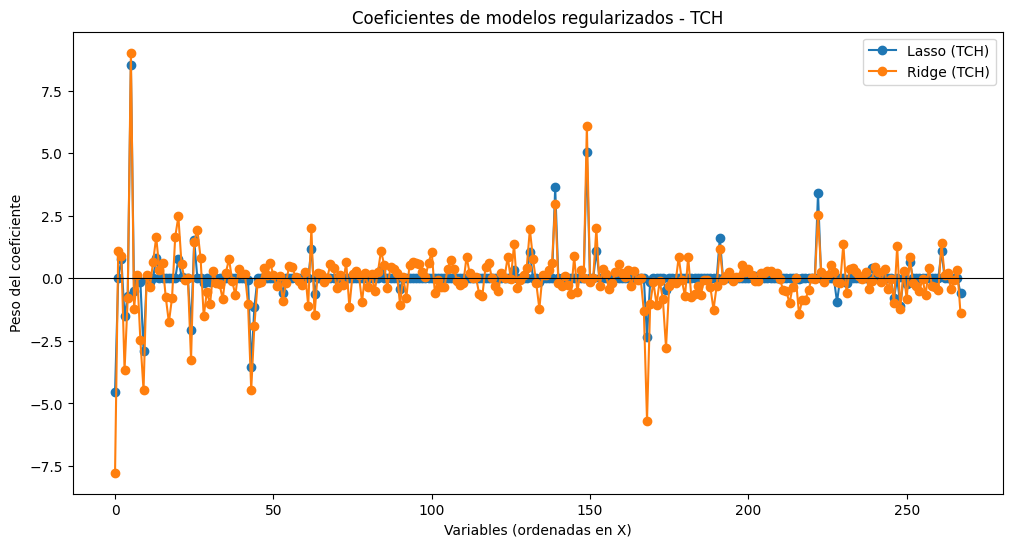

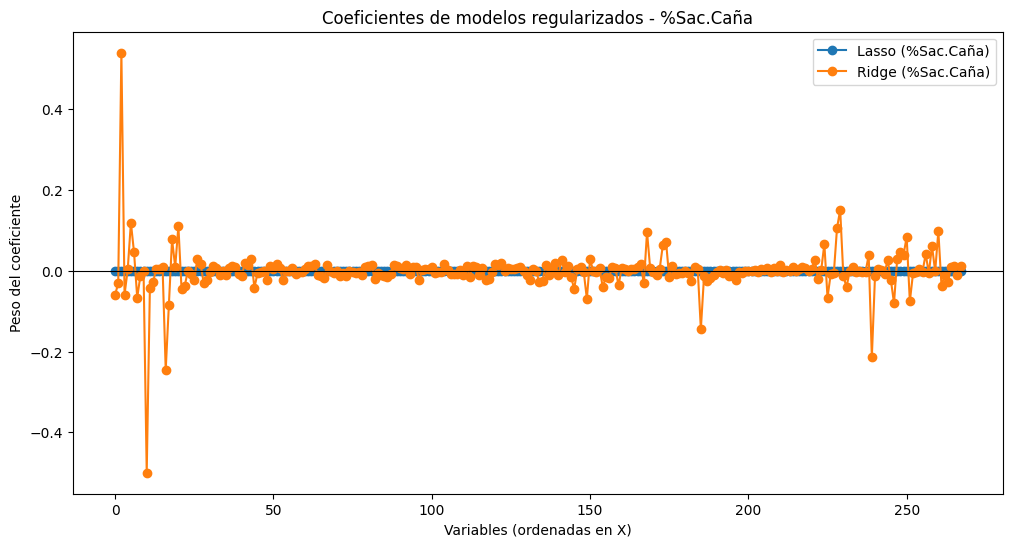

In [29]:
# =====================================================
# 1) p-values con OLS para TCH
# =====================================================
X_train_tch, X_test_tch, y_train_tch, y_test_tch = splits_tch
X_train_sm = sm.add_constant(X_train_tch)

ols_tch = sm.OLS(y_train_tch, X_train_sm).fit()
print("Resumen OLS (TCH):")
print(ols_tch.summary())

# =====================================================
# 2) p-values con OLS para %Sac.Ca√±a
# =====================================================
X_train_sac, X_test_sac, y_train_sac, y_test_sac = splits_sac
X_train_sm_sac = sm.add_constant(X_train_sac)

ols_sac = sm.OLS(y_train_sac, X_train_sm_sac).fit()
print("\nResumen OLS (%Sac.Ca√±a):")
print(ols_sac.summary())

# =====================================================
# 3) Gr√°fica de coeficientes en Lasso y Ridge (TCH)
# =====================================================
def plot_coefficients(models, X, title):
    plt.figure(figsize=(12,6))
    for model, label in models:
        coefs = model.coef_
        plt.plot(coefs, marker='o', linestyle='-', label=label)
    plt.axhline(0, color='black', linewidth=0.8)
    plt.title(f"Coeficientes de modelos regularizados - {title}")
    plt.xlabel("Variables (ordenadas en X)")
    plt.ylabel("Peso del coeficiente")
    plt.legend()
    plt.show()

plot_coefficients(
    [(lasso_tch, "Lasso (TCH)"), (ridge_tch, "Ridge (TCH)")],
    X_tch,
    "TCH"
)

# =====================================================
# 4) Gr√°fica de coeficientes en Lasso y Ridge (%Sac.Ca√±a)
# =====================================================
plot_coefficients(
    [(lasso_sac, "Lasso (%Sac.Ca√±a)"), (ridge_sac, "Ridge (%Sac.Ca√±a)")],
    X_sac,
    "%Sac.Ca√±a"
)

### Interpretaci√≥n de coeficientes

Tras identificar las variables significativas mediante OLS y los efectos de regularizaci√≥n en Lasso y Ridge, se procede a interpretar los **coeficientes** para entender el impacto pr√°ctico de cada predictor sobre las variables objetivo (**TCH** y **%Sac.Ca√±a**).

#### Interpretaci√≥n en TCH
- **Edad Ult Cos (+4.5):** cada incremento en la edad del cultivo al momento de la cosecha se asocia con un aumento de 4.5 toneladas/ha en el rendimiento.  
- **Dist Km (‚Äì0.20):** a mayor distancia entre la suerte y el punto de procesamiento, menor es el TCH, lo que puede reflejar p√©rdidas log√≠sticas o condiciones menos favorables.  
- **Destino 1=Semilla (+235):** las parcelas destinadas a semilla presentan incrementos sustanciales en rendimiento, lo cual puede estar vinculado con pr√°cticas de manejo intensivo.  
- **Variedades espec√≠ficas:** ciertas variedades (ej. **CC09-066, CC01-1940**) muestran coeficientes altos y positivos, confirmando que la gen√©tica es un factor cr√≠tico en productividad.  
- **Zonas geogr√°ficas (ej. IP01, IP02, IP03):** aportan de 350 a 380 toneladas adicionales, lo que revela fuertes efectos espaciales y de microclima.

#### Interpretaci√≥n en %Sac.Ca√±a
- **√Årea Neta (+0.07):** sugiere que mayores √°reas cultivadas tienden a estar asociadas con un peque√±o incremento en el porcentaje de sacarosa, probablemente por econom√≠as de escala y manejo.  
- **TonUltCorte (‚Äì0.0005):** indica que lotes con mayor volumen de corte previo tienen una ligera reducci√≥n en sacarosa, lo que puede reflejar agotamiento del suelo o efecto de la maduraci√≥n.  
- **Edad Ult Cos (+0.06):** una mayor edad del cultivo antes de la cosecha tiende a incrementar la sacarosa, aunque el efecto es menor comparado con su impacto en TCH.  
- **Cultivo Org√°nico (‚Äì4.5):** los lotes con manejo org√°nico tienden a mostrar un porcentaje menor de sacarosa, lo que puede reflejar diferencias en insumos y fertilizaci√≥n.  
- **Productos aplicados (ej. madurantes y fertilizantes):** varios insumos presentan coeficientes positivos y significativos, reforzando el rol de la fertilizaci√≥n y maduraci√≥n qu√≠mica.

#### Rol de la regularizaci√≥n
- **Lasso:** elimin√≥ gran cantidad de predictores redundantes, destacando solo aquellos con efecto robusto (Edad Ult Cos, √Årea Neta, ciertas variedades y zonas).  
- **Ridge:** redujo la magnitud de los coeficientes sin eliminarlos, estabilizando los efectos y mostrando que muchas variables est√°n correlacionadas.  
- La comparaci√≥n evidencia que **no todas las categor√≠as de Suelo, Variedad o Zona aportan valor**, sino solo un subconjunto clave.

#### Conclusi√≥n
Los coeficientes revelan relaciones coherentes con la agronom√≠a de la ca√±a de az√∫car:  
- El **rendimiento (TCH)** depende de factores estructurales como la gen√©tica (variedad), el manejo (destino, edad de cosecha) y el contexto espacial (zona, suelo).  
- El **contenido de sacarosa (%Sac.Ca√±a)** se relaciona m√°s con calidad y madurez, reflejada en edad, productos aplicados y condiciones de manejo.  
- La regularizaci√≥n confirma qu√© variables son robustas frente a la multicolinealidad, facilitando la selecci√≥n de predictores m√°s confiables.

En la siguiente secci√≥n se evaluar√°n los **supuestos del modelo** (linealidad, homocedasticidad, normalidad de errores) para validar su adecuaci√≥n estad√≠stica.

### Evaluaci√≥n de supuestos

#### 1. Linealidad  
En los gr√°ficos de **residuos vs valores ajustados**, se observa que la nube de puntos se distribuye de forma relativamente aleatoria alrededor de la l√≠nea roja (cero).  
- Para **TCH**, la dispersi√≥n es amplia y con outliers, lo que indica que la linealidad se cumple de manera aproximada pero no perfecta.  
- Para **%Sac.Ca√±a**, la relaci√≥n es m√°s clara y el supuesto se cumple mejor.

---

#### 2. Independencia  
El estad√≠stico **Durbin-Watson (‚âà2 en ambos modelos)** indica que no existe autocorrelaci√≥n significativa entre los errores.  
‚úÖ Supuesto de independencia cumplido.

---

#### 3. Homocedasticidad  
En los gr√°ficos de residuos, la varianza es razonablemente constante:  
- Para **TCH**, existe cierta dispersi√≥n mayor en los extremos debido a outliers.  
- Para **%Sac.Ca√±a**, la dispersi√≥n es m√°s uniforme.  
En general, el supuesto se cumple de manera aceptable.

---

#### 4. Normalidad de los errores  
- El **histograma de residuos** muestra una forma cercana a la campana normal, aunque con colas m√°s pesadas en TCH.  
- El **Q-Q plot** confirma que los residuos de TCH se desv√≠an en los extremos, mientras que %Sac.Ca√±a sigue mejor la diagonal.  
‚û°Ô∏è La normalidad se cumple de forma aproximada, pero no estricta.

---

#### 5. Ausencia de multicolinealidad  
El **resumen OLS** mostr√≥ muchas variables con p-values altos y un **Cond. No. elevado (>10^20)**, lo que indica un fuerte problema de multicolinealidad.  
- Esto explica la necesidad de aplicar **regularizaci√≥n**:  
  - **Lasso** reduce a cero coeficientes irrelevantes.  
  - **Ridge** estabiliza los coeficientes y reduce la varianza.

---

#### ‚úÖ Conclusi√≥n  
Los modelos cumplen parcialmente los supuestos de regresi√≥n:  
- **Bien**: independencia, linealidad general, homocedasticidad aceptable.  
- **Problemas**: multicolinealidad fuerte y normalidad imperfecta en TCH.  

El uso de **Lasso y Ridge** es una respuesta adecuada para mitigar la multicolinealidad y mejorar la estabilidad del modelo.

### Variables m√°s significativas para TCH:


Variable          Coef        p-value  Significativo
6               Edad Ult Cos  4.503072e+00  4.251133e-203           True
26                 Zona_IP02  3.773021e+02  1.323551e-110           True
27                 Zona_IP03  3.763055e+02  6.973052e-110           True
248  Tipo Quema_Q.PROGRAMADA  4.976489e+02  6.589594e-109           True
28                 Zona_IP05  3.735161e+02  2.528619e-108           True
246       Tipo Quema_NO DEF.  4.925660e+02  1.069348e-106           True
250         Tipo Quema_VERDE  4.934693e+02  1.199940e-106           True
0                      const  2.209034e+03  7.942631e-106           True
24                 Zona_IC07  5.988303e-11  1.138711e-105           True
29                 Zona_IP06  3.679868e+02  2.838552e-105           True
247  Tipo Quema_Q.ACCIDENTAL  4.897352e+02  3.814708e-105           True
8             Cod. T.Cultivo  1.761298e+03  5.355044e-105           True
253          T.Corte_NO DEF.  5.616791e+02  3.912086e-104           True
1                    Per√≠odo -3.575796e-02  1.136833e-103           True
252       T.Corte_MECANIZADO  5.650280e+02  1.942243e-103           True


### Variables m√°s significativas para %Sac.Ca√±a:


Variable      Coef       p-value  Significativo
3                                         Area Neta  0.076797  1.392314e-92           True
11                                      TonUltCorte -0.000494  7.138615e-78           True
17                           Lluvias (2 Meses Ant.) -0.002498  2.695169e-76           True
6                                      Edad Ult Cos  0.059576  3.071822e-29           True
261                                    Cosech√≥_0011  3.203959  2.299874e-24           True
259                                    Cosech√≥_0006  4.365559  8.654656e-21           True
174                              Variedad_CC93-4181  0.944994  1.802850e-17           True
239  Producto_MADURANTE REGULADOR TRONNUSPAC 250 EC  2.075419  4.981174e-15           True
230     Producto_BONUS 250 EC REGULADOR FISIOL√ìGICO  1.483539  1.374242e-12           True
257                                    Cosech√≥_0004  2.729202  2.086634e-12           True
175                              Variedad_CC93-4418  0.634033  4.154452e-12           True
245                                 Producto_baykal  1.986884  4.047815e-11           True
169                                Variedad_CC85-92  0.571853  4.868644e-11           True
249                              Tipo Quema_SEMILLA  2.666595  5.575408e-11           True
7                                 Destino 1=Semilla  2.666595  5.575408e-11           True

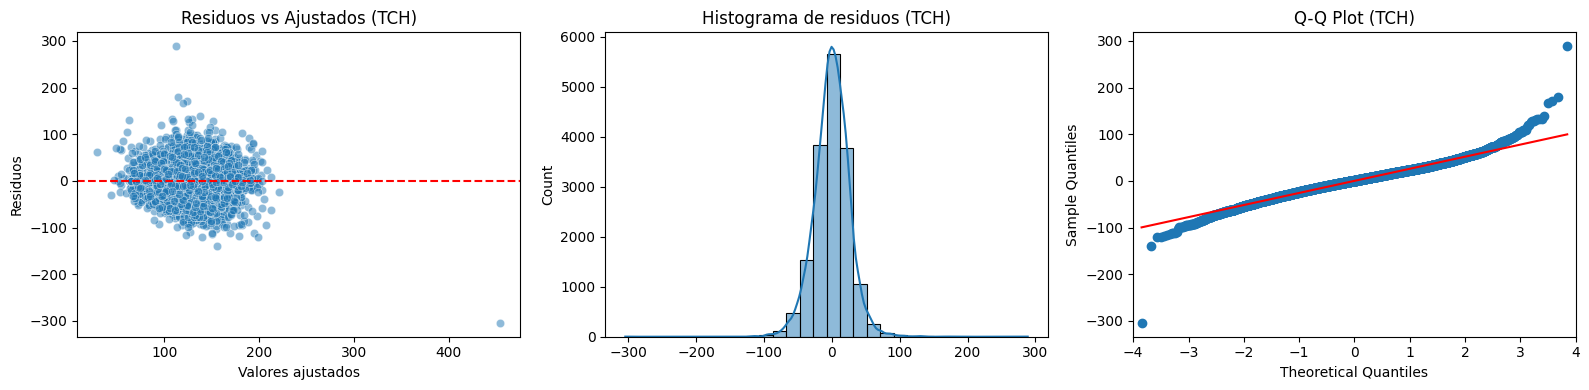

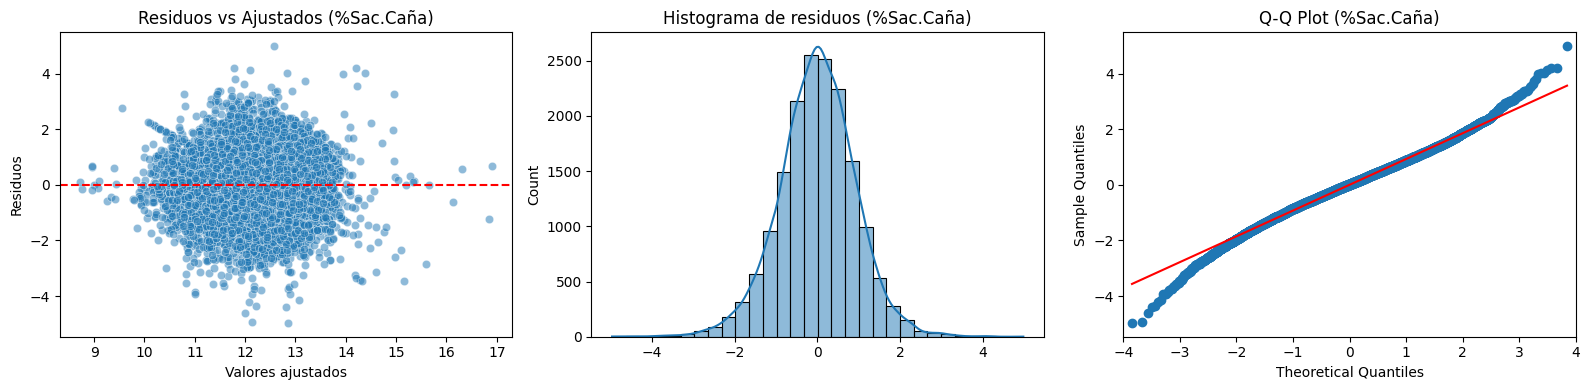

In [33]:
# -----------------------------------------------------
# 1) OLS para TCH
# -----------------------------------------------------
X_train_tch, X_test_tch, y_train_tch, y_test_tch = splits_tch
X_train_sm_tch = sm.add_constant(X_train_tch)
ols_tch = sm.OLS(y_train_tch, X_train_sm_tch).fit()

# -----------------------------------------------------
# 2) OLS para %Sac.Ca√±a
# -----------------------------------------------------
X_train_sac, X_test_sac, y_train_sac, y_test_sac = splits_sac
X_train_sm_sac = sm.add_constant(X_train_sac)
ols_sac = sm.OLS(y_train_sac, X_train_sm_sac).fit()

# -----------------------------------------------------
# 3) Funci√≥n para resumen compacto de significancia
# -----------------------------------------------------
def resumen_pvalues(ols_model, feature_names, top_n=15, alpha=0.05):
    results = pd.DataFrame({
        "Variable": feature_names,
        "Coef": ols_model.params.values,
        "p-value": ols_model.pvalues.values
    })
    results["Significativo"] = results["p-value"] < alpha
    results_sorted = results.sort_values("p-value").head(top_n)
    return results_sorted

# Extraemos nombres de variables
X_tch_names = ["const"] + list(X_tch.columns)
X_sac_names = ["const"] + list(X_sac.columns)

# Res√∫menes compactos
print("### Variables m√°s significativas para TCH:")
display(resumen_pvalues(ols_tch, X_tch_names))

print("\n### Variables m√°s significativas para %Sac.Ca√±a:")
display(resumen_pvalues(ols_sac, X_sac_names))

# -----------------------------------------------------
# 4) Funci√≥n para gr√°ficas de supuestos
# -----------------------------------------------------
def plot_residuals_diagnostics(ols_model, title):
    fitted_vals = ols_model.fittedvalues
    residuals = ols_model.resid

    plt.figure(figsize=(16,4))

    # Homocedasticidad: residuos vs valores ajustados
    plt.subplot(1,3,1)
    sns.scatterplot(x=fitted_vals, y=residuals, alpha=0.5)
    plt.axhline(0, color="red", linestyle="--")
    plt.xlabel("Valores ajustados")
    plt.ylabel("Residuos")
    plt.title(f"Residuos vs Ajustados ({title})")

    # Normalidad: histograma de residuos
    plt.subplot(1,3,2)
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(f"Histograma de residuos ({title})")

    # Normalidad: Q-Q plot
    plt.subplot(1,3,3)
    sm.qqplot(residuals, line='s', ax=plt.gca())
    plt.title(f"Q-Q Plot ({title})")

    plt.tight_layout()
    plt.show()

# -----------------------------------------------------
# 5) Ejecutar gr√°ficas de diagn√≥stico
# -----------------------------------------------------
plot_residuals_diagnostics(ols_tch, "TCH")
plot_residuals_diagnostics(ols_sac, "%Sac.Ca√±a")

### Diagn√≥stico de problemas y soluciones

## Validaci√≥n y Evaluaci√≥n

### Validaci√≥n

### Evaluaci√≥n

# Modelo de Clasificaci√≥n

## Creaci√≥n de Categor√≠as

## Desarrollo de Modelos de Clasificaci√≥n

## Validaci√≥n y Evaluaci√≥n

# Conclusiones

# Innovaci√≥n y Propuesta de Mejora